<a href="https://colab.research.google.com/github/chrishunt11/Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2
Name: Christopher Hunt

# Dataset 1 (International Football Results from 1872 to 2023)

In [652]:
import pandas as pd
fname = '/content/drive/MyDrive/Bootcamp: Coding Dojo/Projects/Project 2/Data/soccer_results.csv'
dff = pd.read_csv(fname)
pd.set_option('display.max_columns',100)
dff.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Source of data
- [International football results from 1872 to 2023](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017?select=results.csv)


Brief description of data
- This dataset has every international football results from 1872-2023

What is the target?
- The target is to predict if the home team won.


What does one row represent? (A person? A business? An event? A product?)
- One row represents a game played, an event.


Is this a classification or regression problem?
- This dataset is a classification problem.


How many features does the data have?
- This dataset has 9 features.


How many rows are in the dataset?
- This dataset has 44762 rows.

What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
- Some challenges I see are trying to figure out how to add in rows to determine whether the home team has won or not. Also choosing the appropriate columns

# International Football

## Adding in a home_result column

In [653]:
# creating a function to call to determine whether the home team win = 0, loss = 1, tie = 2
def determine_outcome(row):
    if row['home_score'] > row['away_score']:
        return 'win'  # 0 represents 'win' for home team
    elif row['home_score'] < row['away_score']:
        return 'loss'  # 1 represents 'win' for away team
    else:
        return 'tie'  # 2 represents 'tie'

In [654]:
# applying the function to create a home_win column
dff['home_result'] = dff.apply(determine_outcome, axis=1)

In [655]:
# checking to see if the function worked
dff.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,win
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,loss
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,loss
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,win
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,win


The function works properly, now lets clean the data.

## Cleaning the data

In [656]:
# checking the duplicated rows
dff.duplicated().sum()

0

There are no duplicated rows

In [657]:
# checking for missing values
dff.isna().sum()

date           0
home_team      0
away_team      0
home_score     0
away_score     0
tournament     0
city           0
country        0
neutral        0
home_result    0
dtype: int64

There are no missing values

In [658]:
# checking for inconsistent values
cat_cols = dff.select_dtypes('object').columns
for col in cat_cols:
  print('Value counts:', col)
  print(dff[col].value_counts())
  print('\n')

Value counts: date
2012-02-29    66
2016-03-29    64
2008-03-26    60
2014-03-05    59
2012-11-14    56
              ..
1965-12-13     1
1994-12-21     1
1965-12-28     1
1965-12-29     1
1872-11-30     1
Name: date, Length: 15610, dtype: int64


Value counts: home_team
Brazil                       597
Argentina                    577
Mexico                       562
Germany                      530
England                      527
                            ... 
Romani people                  1
Saint Pierre and Miquelon      1
Central Spain                  1
Sark                           1
Ticino                         1
Name: home_team, Length: 311, dtype: int64


Value counts: away_team
Uruguay          562
Sweden           548
England          526
Hungary          492
Paraguay         475
                ... 
Andalusia          1
Asturias           1
Central Spain      1
Corsica            1
Aymara             1
Name: away_team, Length: 306, dtype: int64


Value counts: tourna

Checking the date column to see if multiple games were played on one day

In [659]:
# looking up the date to see if multiple matches were played on that day
dff[dff['date'] == '2012-02-29']

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_result
34288,2012-02-29,Antigua and Barbuda,Trinidad and Tobago,0,4,Friendly,St. John's,Antigua and Barbuda,False,loss
34289,2012-02-29,Armenia,Canada,3,1,Friendly,Limassol,Cyprus,True,win
34290,2012-02-29,Australia,Saudi Arabia,4,2,FIFA World Cup qualification,Melbourne,Australia,False,win
34291,2012-02-29,Austria,Finland,3,1,Friendly,Klagenfurt,Austria,False,win
34292,2012-02-29,Bahrain,Indonesia,10,0,FIFA World Cup qualification,Riffa,Bahrain,False,win
...,...,...,...,...,...,...,...,...,...,...
34349,2012-02-29,Tanzania,Mozambique,1,1,African Cup of Nations qualification,Dar es Salaam,Tanzania,False,tie
34350,2012-02-29,Tunisia,Peru,1,1,Friendly,Tunis,Tunisia,False,tie
34351,2012-02-29,Turkey,Slovakia,1,2,Friendly,Bursa,Turkey,False,loss
34352,2012-02-29,United Arab Emirates,Lebanon,4,2,FIFA World Cup qualification,Abu Dhabi,United Arab Emirates,False,win


There are not any inconsistencies in the dataframe

### Splitting the date column into three seperate columns

In [660]:
# replacing hyphens with spaces in date column
dff['date'] = dff['date'].str.replace('-', ' ')

# creating a year, month, and date column
dff[['year', 'month', 'day']] = dff['date'].str.split(' ', expand=True)

# converting the columns from string to integer
dff['year'] = dff['year'].astype(int)
dff['month'] = dff['month'].astype(int)
dff['day'] = dff['day'].astype(int)

# dropping the original date column
dff.drop(columns='date', inplace=True)

In [661]:
# checking to see if the new columns were added
dff.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_result,year,month,day
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,tie,1872,11,30
1,England,Scotland,4,2,Friendly,London,England,False,win,1873,3,8
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,1874,3,7
3,England,Scotland,2,2,Friendly,London,England,False,tie,1875,3,6
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,1876,3,4


In [662]:
dff.describe(include='object')

,home_team,away_team,tournament,city,country,home_result
count,44762,44762,44762,44762,44762,44762
unique,311,306,145,2030,268,3
top,Brazil,Uruguay,Friendly,Kuala Lumpur,United States,win
freq,597,562,17653,677,1325,21797


home_team, away_team, tournament, and country all have high cardinality
 - will drop these

In [663]:
# deleting the unnecessary columns
dff = dff.drop(columns = ['city', 'home_team', 'away_team', 'tournament', 'country'])

## Univariate visuals for Target and all features

### Univariate

In [664]:
# importing packages
import matplotlib.pyplot as plt
import seaborn as sns
dff.head()

,home_score,away_score,neutral,home_result,year,month,day
0,0,0,False,tie,1872,11,30
1,4,2,False,win,1873,3,8
2,2,1,False,win,1874,3,7
3,2,2,False,tie,1875,3,6
4,3,0,False,win,1876,3,4


#### home_score

home_score = full-time home team score including extra time, not including penalty-shootouts

##### Creating a graph showing the average amount of goals scored per game

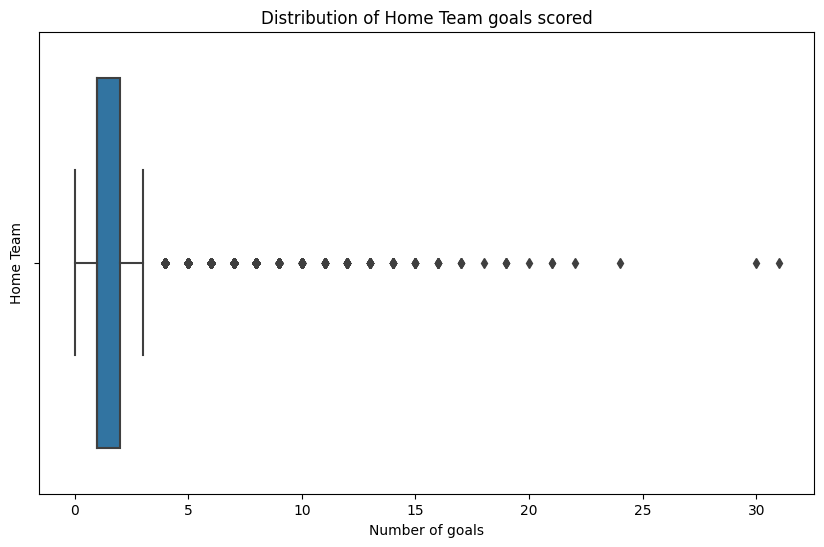

In [665]:
# creating the figure size
plt.figure(figsize=(10,6))

# creating a barplot
ax = sns.boxplot(data=dff, x='home_score')

# creating xlabel, ylabel, and title
ax.set_title('Distribution of Home Team goals scored')
ax.set_xlabel('Number of goals')
ax.set_ylabel('Home Team');

As we can see from this boxplot, the average score per home game is about 2 a game and there are numerous outliars. With some games the Home team scoring up to as many as 30 goals

#### away_score

away_score = full-time away team score including extra time, not including penalty-shootouts

##### Creating a graph showing the average amount of goals scored per game

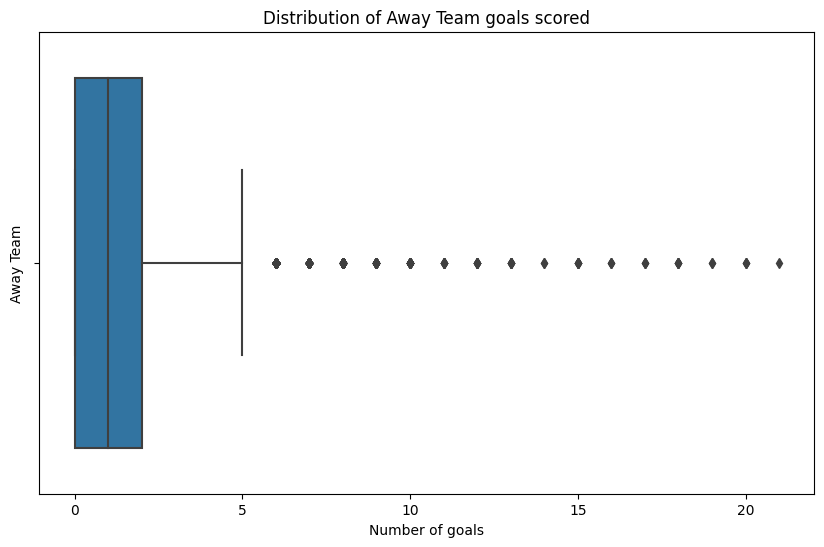

In [666]:
# creating the figure size
plt.figure(figsize=(10,6))

# creating a barplot
ax = sns.boxplot(data=dff, x='away_score')

# creating xlabel, ylabel, and title
ax.set_title('Distribution of Away Team goals scored')
ax.set_xlabel('Number of goals')
ax.set_ylabel('Away Team');

As we can see from the visualization above, the average amount of goals scored for the away team per game is about 1. There are quite a few outliars with some games the away team scoring up to as many as 21 goals.

#### neutral

neutral = TRUE/FALSE column indicating whether the match was played at a neutral venue

##### Creating a graph showing the amount of neutral matches played


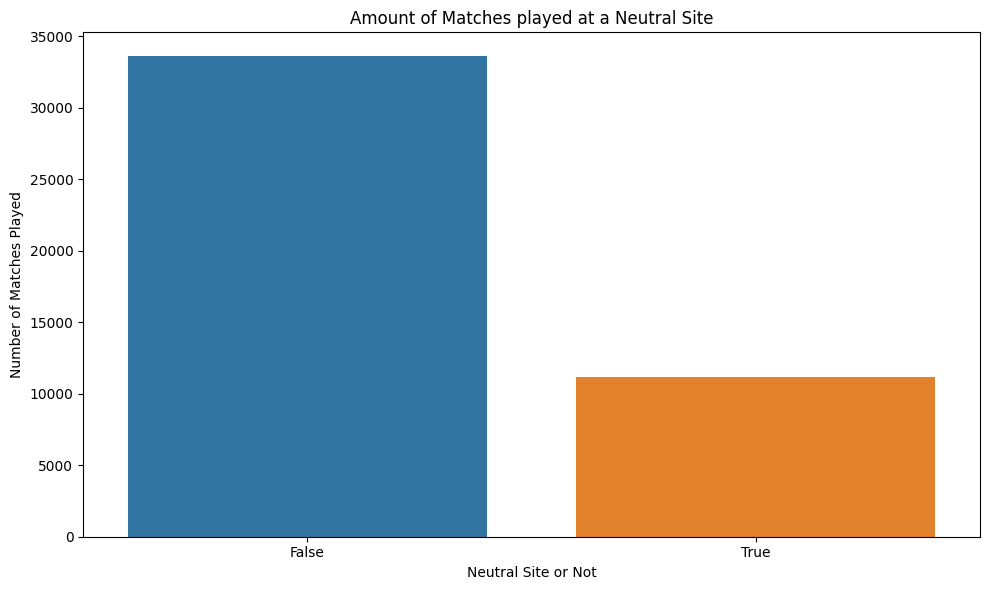

In [667]:
# count of the occurances of each type of game has been played
neutral = dff['neutral'].value_counts(ascending=False)

# creating a barplot
plt.figure(figsize=(10,6))
ax = sns.barplot(x=neutral.index, y=neutral.values);
ax.set_title('Amount of Matches played at a Neutral Site')
ax.set_xlabel('Neutral Site or Not')
ax.set_ylabel('Number of Matches Played')
plt.tight_layout();

As we can see from the visual above, most of the matches played are not at a Nuetral site.

#### year

year = the year the match was played

##### creating a histplot of all the years the matches were played

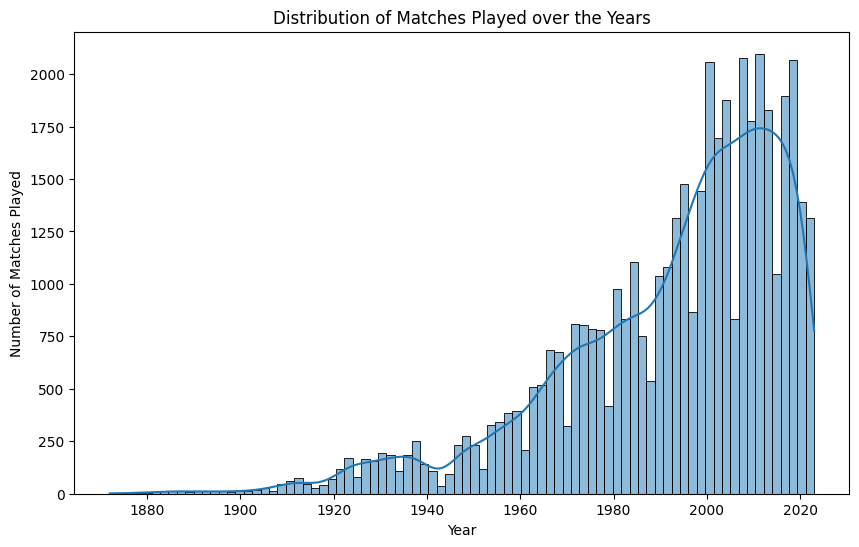

In [668]:
# changing the size of the figure
plt.figure(figsize=(10,6))

# creating a histogram of year
ax = sns.histplot(data=dff, x='year', kde=True)

# setting the x label, y label, and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Matches Played')
ax.set_title('Distribution of Matches Played over the Years');

As we can see from the visual above, majority of the matches were played after the year 2000.

#### month

month = the month the match was played

##### creating a histogram of matches played per month

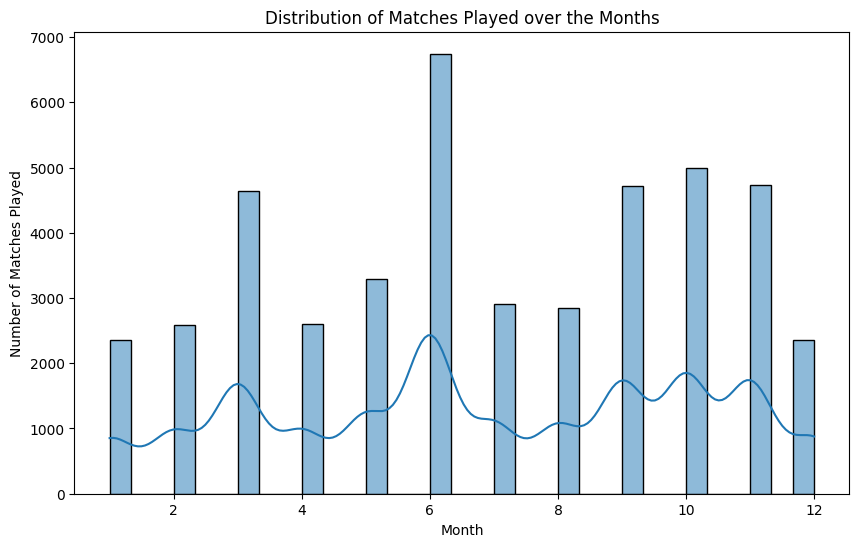

In [669]:
# changing the size of the figure
plt.figure(figsize=(10,6))

# creating a histogram of month
ax = sns.histplot(data=dff, x='month', kde=True)

# setting the x label, y label, and title
ax.set_xlabel('Month')
ax.set_ylabel('Number of Matches Played')
ax.set_title('Distribution of Matches Played over the Months');

As we can see from the visualization above, most of the matches were played during month 6 (June).

#### day

day = the day of the month the match was played on

##### creating a histogram of the day of the month the match was played on

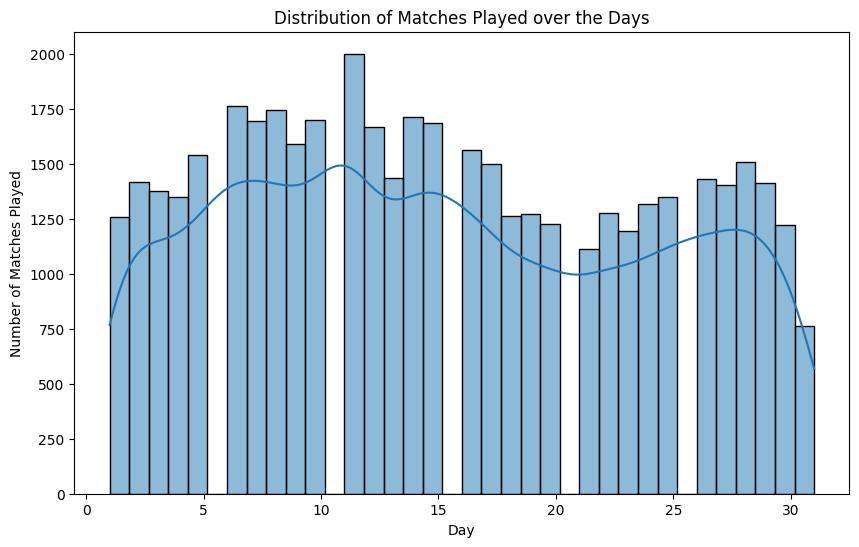

In [670]:
# changing the size of the figure
plt.figure(figsize=(10,6))

# creating a histogram of year
ax = sns.histplot(data=dff, x='day', kde=True)

# setting the x label, y label, and title
ax.set_xlabel('Day')
ax.set_ylabel('Number of Matches Played')
ax.set_title('Distribution of Matches Played over the Days');

As we can see from the visualization above most matches seem to have been played between day 5 and 15.

#### home_win (target)

home_win = determines if the home team won, lost, or tied.


##### Making a graph showing the amount of time a home team won, lost, or tied

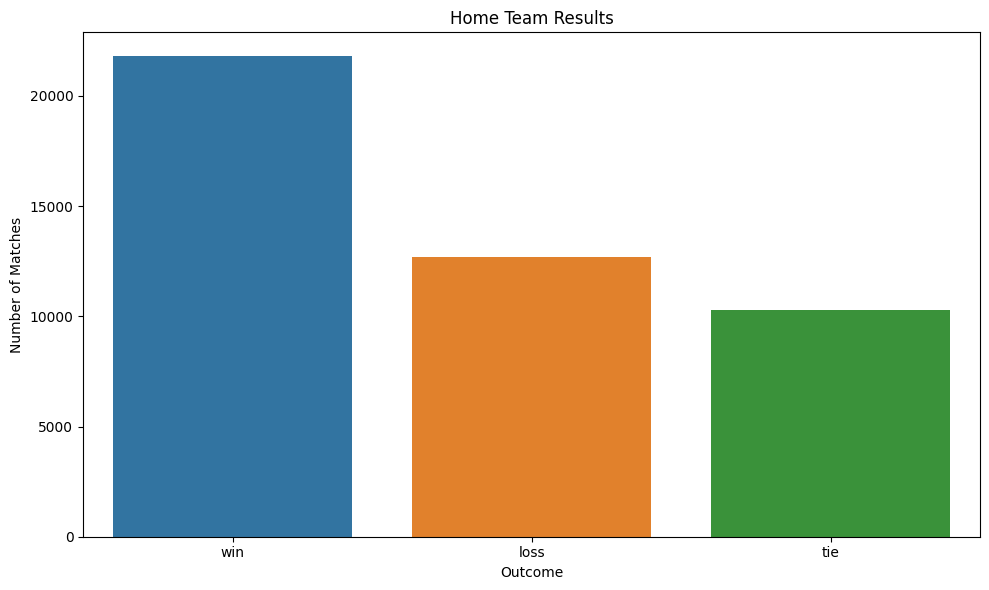

In [671]:
# count of the occurances of each type of game has been played
neutral = dff['home_result'].value_counts(ascending=False)

# creating a barplot
plt.figure(figsize=(10,6))
ax = sns.barplot(x=neutral.index, y=neutral.values);
ax.set_title('Home Team Results')
ax.set_xlabel('Outcome')
ax.set_ylabel('Number of Matches')
plt.tight_layout();

As we can see from the graph above, the home team wins more games than they lose or tie.

# Dataset 2 (NBA Database 1946-2023)

In [672]:
import pandas as pd
fname = '/content/drive/MyDrive/Bootcamp: Coding Dojo/Projects/Project 2/Data/game.csv'
df = pd.read_csv(fname)
pd.set_option('display.max_columns',100)
df.tail(10)

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
65688,42022,1610612738,BOS,Boston Celtics,42200305,2023-05-25 00:00:00,BOS vs. MIA,W,240,40.0,79.0,0.506,16.0,39.0,0.410,14.0,19.0,0.737,12.0,25.0,37.0,23.0,13.0,4.0,10.0,9.0,110.0,13,1,1610612748,MIA,Miami Heat,MIA @ BOS,L,40.0,78.0,0.513,9.0,23.0,0.391,8.0,10.0,0.800,10.0,26.0,36.0,20.0,6.0,2.0,16.0,13.0,97.0,-13,1,Playoffs
65689,42022,1610612748,MIA,Miami Heat,42200306,2023-05-27 00:00:00,MIA vs. BOS,L,240,33.0,93.0,0.355,14.0,30.0,0.467,23.0,29.0,0.793,17.0,30.0,47.0,22.0,5.0,4.0,5.0,24.0,103.0,-1,1,1610612738,BOS,Boston Celtics,BOS @ MIA,W,34.0,78.0,0.436,7.0,35.0,0.200,29.0,34.0,0.853,12.0,35.0,47.0,18.0,4.0,8.0,12.0,22.0,104.0,1,1,Playoffs
65690,42022,1610612738,BOS,Boston Celtics,42200307,2023-05-29 00:00:00,BOS vs. MIA,L,240,32.0,82.0,0.390,9.0,42.0,0.214,11.0,13.0,0.846,10.0,30.0,40.0,18.0,6.0,4.0,15.0,13.0,84.0,-19,1,1610612748,MIA,Miami Heat,MIA @ BOS,W,42.0,86.0,0.488,14.0,28.0,0.500,5.0,6.0,0.833,7.0,35.0,42.0,26.0,7.0,2.0,14.0,15.0,103.0,19,1,Playoffs
65691,42022,1610612743,DEN,Denver Nuggets,42200401,2023-06-01 00:00:00,DEN vs. MIA,W,240,40.0,79.0,0.506,8.0,27.0,0.296,16.0,20.0,0.800,6.0,39.0,45.0,29.0,4.0,4.0,10.0,8.0,104.0,11,1,1610612748,MIA,Miami Heat,MIA @ DEN,L,39.0,96.0,0.406,13.0,39.0,0.333,2.0,2.0,1.000,11.0,32.0,43.0,26.0,5.0,4.0,8.0,15.0,93.0,-11,1,Playoffs
65692,42022,1610612743,DEN,Denver Nuggets,42200402,2023-06-04 00:00:00,DEN vs. MIA,L,240,39.0,75.0,0.520,11.0,28.0,0.393,19.0,22.0,0.864,9.0,29.0,38.0,23.0,7.0,2.0,14.0,21.0,108.0,-3,1,1610612748,MIA,Miami Heat,MIA @ DEN,W,38.0,78.0,0.487,17.0,35.0,0.486,18.0,20.0,0.900,8.0,23.0,31.0,28.0,5.0,4.0,11.0,22.0,111.0,3,1,Playoffs
65693,42022,1610612748,MIA,Miami Heat,42200403,2023-06-07 00:00:00,MIA vs. DEN,L,240,34.0,92.0,0.370,11.0,35.0,0.314,15.0,19.0,0.789,10.0,23.0,33.0,20.0,7.0,3.0,4.0,22.0,94.0,-15,1,1610612743,DEN,Denver Nuggets,DEN @ MIA,W,41.0,80.0,0.513,5.0,18.0,0.278,22.0,27.0,0.815,13.0,45.0,58.0,28.0,3.0,5.0,14.0,18.0,109.0,15,1,Playoffs
65694,42022,1610612748,MIA,Miami Heat,42200404,2023-06-09 00:00:00,MIA vs. DEN,L,240,35.0,78.0,0.449,8.0,25.0,0.320,17.0,20.0,0.850,8.0,29.0,37.0,23.0,2.0,3.0,15.0,19.0,95.0,-13,1,1610612743,DEN,Denver Nuggets,DEN @ MIA,W,39.0,79.0,0.494,14.0,28.0,0.500,16.0,21.0,0.762,5.0,29.0,34.0,26.0,11.0,7.0,8.0,18.0,108.0,13,1,Playoffs
65695,42022,1610612743,DEN,Denver Nuggets,42200405,2023-06-12 00:00:00,DEN vs. MIA,W,240,38.0,84.0,0.452,5.0,28.0,0.179,13.0,23.0,0.565,11.0,46.0,57.0,21.0,6.0,7.0,15.0,13.0,94.0,5,1,1610612748,MIA,Miami Heat,MIA @ DEN,L,33.0,96.0,0.344,9.0,35.0,0.257,14.0,16.0,0.875,11.0,33.0,44.0,18.0,9.0,7.0,8.0,21.0,89.0,-5,1,Playoffs
65696,32022,1610616834,LBN,Team LeBron,32200001,2023-02-19 00:00:00,LBN vs. GNS,L,221,79.0,132.0,0.598,17.0,60.0,0.283,0.0,0.0,NaN,13.0,32.0,45.0,49.0,7.0,2.0,10.0,5.0,175.0,-9,1,1610616833,GNS,Team Giannis,GNS @ LBN,W,76.0,123.0,0.618,29.0,66.0,0.439,3.0,4.0,0.750,10.0,36.0,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,1,All-Star
65697,32022,1610616834,LBN,Team LeBron,32200001,2023-02-19 00:00:00,LBN vs. GNS,L,221,79.0,132.0,0.598,17.0,60.0,0.283,0.0,0.0,NaN,13.0,32.0,45.0,49.0,7.0,2.0,10.0,5.0,175.0,-9,1,1610616833,GNS,Team Giannis,GNS @ LBN,W,76.0,123.0,0.618,29.0,66.0,0.439,3.0,4.0,0.750,10.0,36.0,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,1,All Star


Source of data
- [NBA Database](https://www.kaggle.com/datasets/wyattowalsh/basketball)


Brief description of data
- This dataset has all games played since the 1946-1947 season

What is the target?
- The target is Home team wins/loss

What does one row represent? (A person? A business? An event? A product?)
- One row represents a single game

Is this a classification or regression problem?
- This is a classification problem.

How many features does the data have?
- This dataset has 55 features.

How many rows are in the dataset?
- This dataset has 65698 rows.

What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
- Some challenges I see are dropping and choosing the appropriate features to help predict if the home team wins.

# NBA

#### Cleaning the data

In [673]:
# checking the stats
df.describe().round(2)

,season_id,team_id_home,game_id,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away
count,65698.00,6.569800e+04,65698.00,65698.0,65685.00,50251.00,50208.00,52480.00,47015.00,46624.00,65682.00,62694.00,62689.00,46762.00,46699.00,49969.00,49893.00,46849.00,47072.00,47014.00,62842.00,65698.00,65698.00,65698.0,6.569800e+04,65685.00,50251.00,50209.00,52480.00,47015.00,46736.00,65685.00,62694.00,62692.00,46762.00,46700.00,49973.00,49897.00,46849.00,47073.00,47013.0,62847.00,65698.00,65698.00,65698.0
mean,22949.34,1.609926e+09,25847473.13,221.0,39.67,83.99,0.47,5.74,17.74,0.35,20.69,27.14,0.76,12.11,31.41,43.76,23.94,7.99,5.31,14.78,22.38,104.62,3.63,0.2,1.608946e+09,38.35,83.77,0.45,5.64,17.78,0.34,19.79,26.04,0.75,11.69,30.24,42.12,22.14,7.85,4.68,15.2,23.10,100.99,-3.63,0.2
std,5000.31,3.324313e+07,6303760.43,67.9,6.77,9.16,0.06,4.54,10.55,0.15,7.14,8.85,0.10,4.44,5.61,7.09,5.69,3.11,2.77,4.14,5.04,14.76,13.09,0.4,5.178990e+07,6.48,9.12,0.06,4.45,10.46,0.15,6.84,8.50,0.10,4.28,5.59,6.87,5.38,3.03,2.50,4.3,5.23,14.42,13.09,0.4
min,12005.00,4.500000e+01,10500001.00,0.0,4.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,18.00,-68.00,0.0,4.100000e+01,4.00,0.00,0.16,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,19.00,-73.00,0.0
25%,21981.00,1.610613e+09,21300533.25,240.0,35.00,78.00,0.43,2.00,10.00,0.26,16.00,21.00,0.69,9.00,28.00,39.00,20.00,6.00,3.00,12.00,19.00,95.00,-5.00,0.0,1.610613e+09,34.00,78.00,0.42,2.00,10.00,0.25,15.00,20.00,0.69,9.00,26.00,37.00,18.00,6.00,3.00,12.0,20.00,92.00,-12.00,0.0
50%,21997.00,1.610613e+09,26300068.50,240.0,40.00,84.00,0.47,5.00,16.00,0.35,20.00,27.00,0.76,12.00,31.00,43.00,24.00,8.00,5.00,15.00,22.00,105.00,4.00,0.0,1.610613e+09,38.00,83.00,0.46,5.00,16.00,0.33,19.00,25.00,0.76,11.00,30.00,42.00,22.00,8.00,4.00,15.0,23.00,101.00,-4.00,0.0
75%,22011.00,1.610613e+09,28800693.75,240.0,44.00,89.00,0.51,9.00,24.00,0.43,25.00,33.00,0.82,15.00,35.00,48.00,28.00,10.00,7.00,17.00,26.00,114.00,12.00,0.0,1.610613e+09,43.00,89.00,0.49,8.00,24.00,0.42,24.00,31.00,0.82,14.00,34.00,47.00,26.00,10.00,6.00,18.0,26.00,110.00,5.00,0.0
max,42022.00,1.610617e+09,49800087.00,365.0,84.00,240.00,0.70,28.00,77.00,1.00,61.00,86.00,4.17,44.00,56.00,85.00,60.00,27.00,23.00,39.00,122.00,192.00,73.00,1.0,1.610617e+09,82.00,149.00,3.56,35.00,90.00,1.00,57.00,91.00,5.25,40.00,60.00,90.00,89.00,27.00,19.00,40.0,115.00,196.00,68.00,1.0


In [674]:
df.describe(include='object')

,team_abbreviation_home,team_name_home,game_date,matchup_home,wl_home,team_abbreviation_away,team_name_away,matchup_away,wl_away,season_type
count,65698,65698,65698,65698,65696,65698,65698,65698,65696,65698
unique,97,98,12882,2292,2,101,101,2292,2,5
top,BOS,Boston Celtics,2022-04-10 00:00:00,BOS vs. NYK,W,BOS,Boston Celtics,NYK @ BOS,L,Regular Season
freq,3124,3124,15,258,40649,3083,3083,258,40649,60192


- team_name_home, team_name_away have very high cardinality. Probably not relevant to whether a team wins or not
- team_abbreviation_home/away, game_date, matchup_home/away are not relevant and are high cardinality
   - will drop these as well

In [676]:
# dropping unnecessary columns
df = df.drop(columns = ['season_id', 'team_id_home', 'team_abbreviation_home',
                          'matchup_home','game_id', 'min', 'video_available_home',
                          'team_id_away', 'team_abbreviation_away', 'matchup_away',
                          'video_available_away', 'wl_away', 'plus_minus_home',
                        'plus_minus_away', 'team_name_home', 'team_name_away',
                        'fgm_away',	'fga_away',	'fg_pct_away',	'fg3m_away',
                        'fg3a_away',	'fg3_pct_away',	'ftm_away',	'fta_away',
                        'ft_pct_away',	'oreb_away',	'dreb_away',	'reb_away',
                        'ast_away',	'stl_away',	'blk_away',	'tov_away',	'pf_away',
                        'pts_away'])

Dropping these columns because it is not relevant to the target (home win)

In [677]:
# checking for duplicated values
df.duplicated().sum()

0

There are no duplicated rows

In [678]:
# viewing any na values
df.isna().sum()

game_date           0
wl_home             2
fgm_home           13
fga_home        15447
fg_pct_home     15490
fg3m_home       13218
fg3a_home       18683
fg3_pct_home    19074
ftm_home           16
fta_home         3004
ft_pct_home      3009
oreb_home       18936
dreb_home       18999
reb_home        15729
ast_home        15805
stl_home        18849
blk_home        18626
tov_home        18684
pf_home          2856
pts_home            0
season_type         0
dtype: int64

In [679]:
# dropping any na values
df.dropna(inplace=True)

Dropping any columns with NA in them as these were games played before 1980 and these stats were not tracked.

In [680]:
# checking for na values again
df.isna().sum()

game_date       0
wl_home         0
fgm_home        0
fga_home        0
fg_pct_home     0
fg3m_home       0
fg3a_home       0
fg3_pct_home    0
ftm_home        0
fta_home        0
ft_pct_home     0
oreb_home       0
dreb_home       0
reb_home        0
ast_home        0
stl_home        0
blk_home        0
tov_home        0
pf_home         0
pts_home        0
season_type     0
dtype: int64

In [681]:
# converting the game_date column to pandas datetime format
df['game_date'] = pd.to_datetime(df['game_date'])

# creating just a year column because the month and day are irrelevant
df['year'] = df['game_date'].dt.year

# dropping game_date column
df.drop(columns='game_date', inplace=True)

# I looked this up online and found out how to do this from a combination of different websites/ trial and error

In [682]:
# checking for inconsistent values
cat_cols = df.select_dtypes('object').columns
for col in cat_cols:
  print('Value counts:', col)
  print(df[col].value_counts())
  print('\n')

Value counts: wl_home
W    27925
L    18417
Name: wl_home, dtype: int64


Value counts: season_type
Regular Season    42047
Playoffs           2688
Pre Season         1534
All Star             38
All-Star             35
Name: season_type, dtype: int64




In [683]:
# Fixing the All Star for seaon type
df['season_type'] = df['season_type'].replace({'All-Star':'All Star'})

- No more inconsistent category names


In [684]:
# selecting only regular season and playoff rows
df = df.loc[df['season_type'].isin(['Regular Season', 'Playoffs'])]

In [685]:
# checking the value counts for season type
df['season_type'].value_counts()

Regular Season    42047
Playoffs           2688
Name: season_type, dtype: int64

Everything looks good here with all the data filtered out


In [686]:
# taking a look of year value counts
df['year'].value_counts()

2021    1625
2017    1347
2022    1336
2014    1334
2016    1333
2008    1332
2005    1322
2010    1321
2015    1319
2018    1316
2009    1316
2007    1309
2003    1279
2019    1267
1997    1262
2001    1253
2006    1252
2004    1247
1995    1222
1999    1213
2000    1206
2002    1205
1996    1201
1993    1191
1991    1175
1990    1158
1992    1141
1994    1108
1989    1097
1988    1025
2012    1018
1987     940
1986     887
2011     885
1998     836
2023     768
2020     706
2013     551
1985     385
1983      14
1982      12
1984      11
1981       7
1980       3
Name: year, dtype: int64

In [687]:
# dropping year 1980-1985 due to low amount of games
df = df.loc[~df['year'].isin([1980, 1981, 1982, 1983, 1984, 1985])]

In [688]:
# remap the win loss column to 1 = win, 0 = loss
def determine_outcome(row):
    if row['wl_home'] == 'W':
        return 1
    else:
        return 0

# Applying the function to create a new column 'wl_home'
df['wl_home'] = df.apply(determine_outcome, axis=1)

### Univariate

In [689]:
df.tail(1)

,wl_home,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,season_type,year
65695,1,38.0,84.0,0.452,5.0,28.0,0.179,13.0,23.0,0.565,11.0,46.0,57.0,21.0,6.0,7.0,15.0,13.0,94.0,Playoffs,2023


#### wl_home (target)

wl_home = home team win or loss

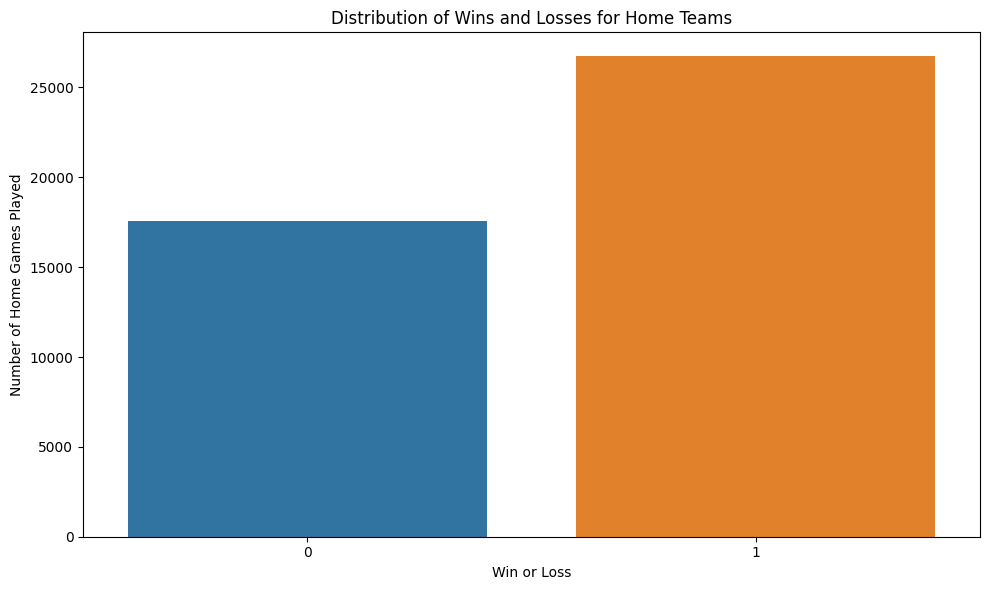

In [690]:
# creating a countplot
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='wl_home');
ax.set_title('Distribution of Wins and Losses for Home Teams')
ax.set_xlabel('Win or Loss')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the figure above, home teams win a significantly amount more games than they lose

#### fgm_home

fgm_home = field goal's made for the home team

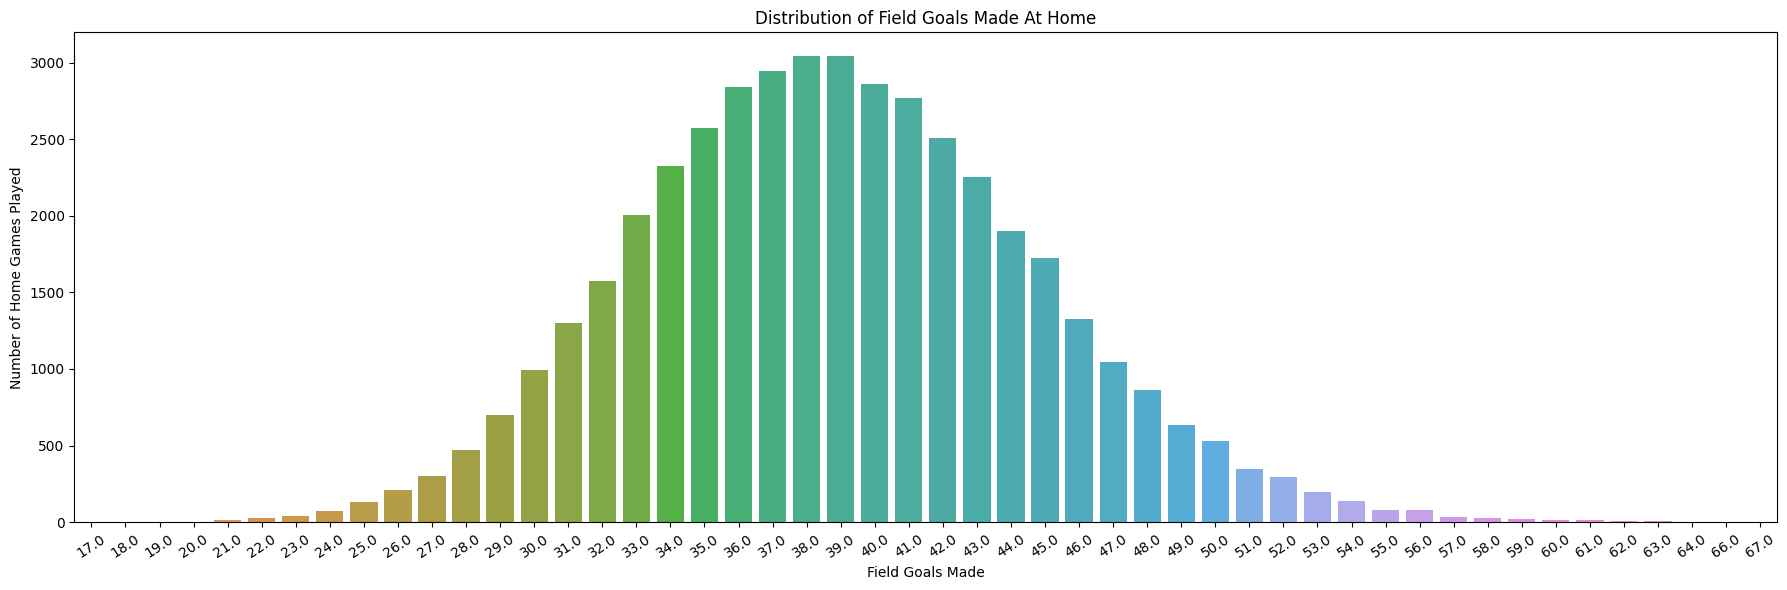

In [691]:
# creating a countplot
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df, x='fgm_home');
ax.set_title('Distribution of Field Goals Made At Home')
ax.set_xlabel('Field Goals Made')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=33)
plt.tight_layout();

As we can see from the figure above, the majority amount of field goals made at home is between 38-39.

#### fga_home

fga_home = field goal attempts at home

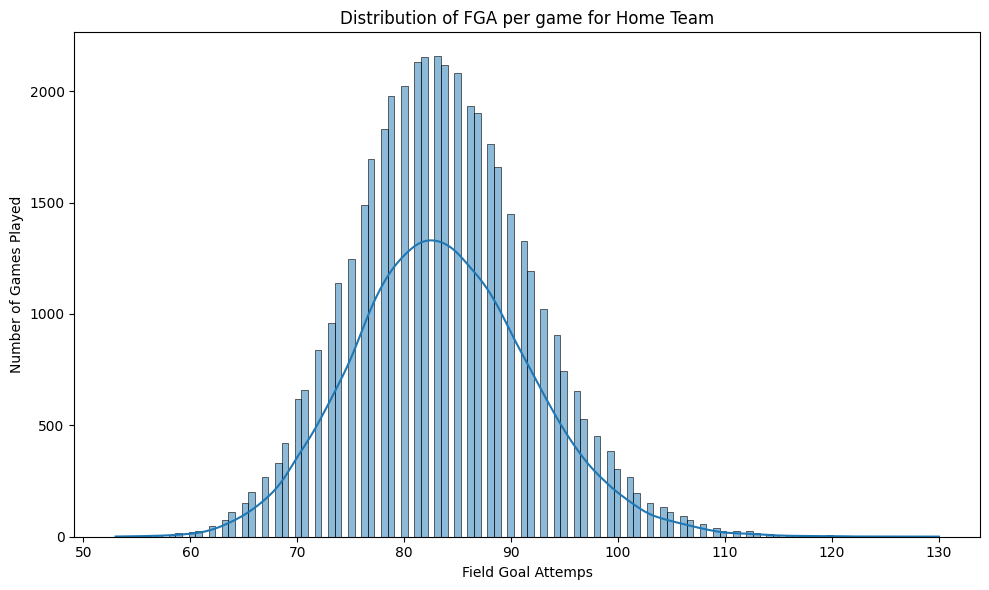

In [692]:
# creating a histogram
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df, x='fga_home', bins='auto', kde=True);
ax.set_title('Distribution of FGA per game for Home Team')
ax.set_xlabel('Field Goal Attemps')
ax.set_ylabel('Number of Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

From the visual above you can see that most teams took an average of 82 field goals.

#### fg_pct_home

fg_pct_home = field goal percentage at home

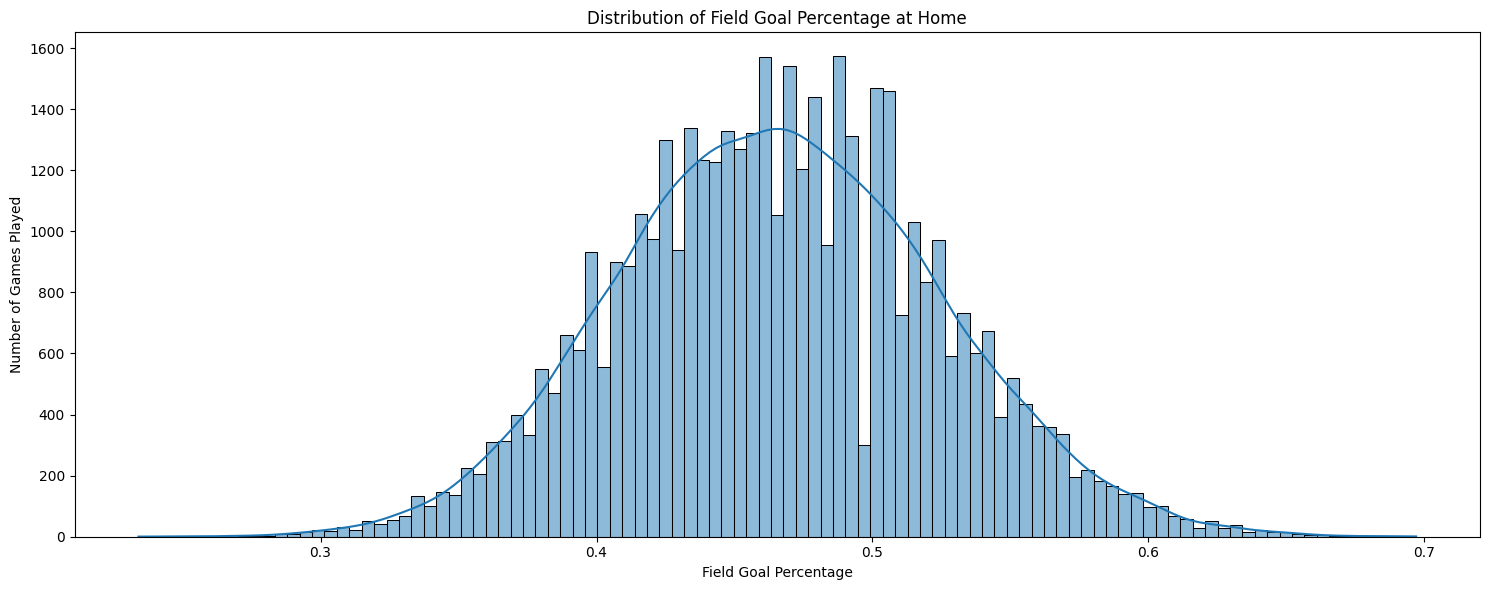

In [693]:
# creating a histogram
plt.figure(figsize=(15,6))
ax = sns.histplot(data=df, x='fg_pct_home', bins='auto', kde=True);
ax.set_title('Distribution of Field Goal Percentage at Home')
ax.set_xlabel('Field Goal Percentage')
ax.set_ylabel('Number of Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the figure above, the average field goal percentage at Home is about 45%

#### fg3m_home

fg3m_home = 3 point field goals made at home

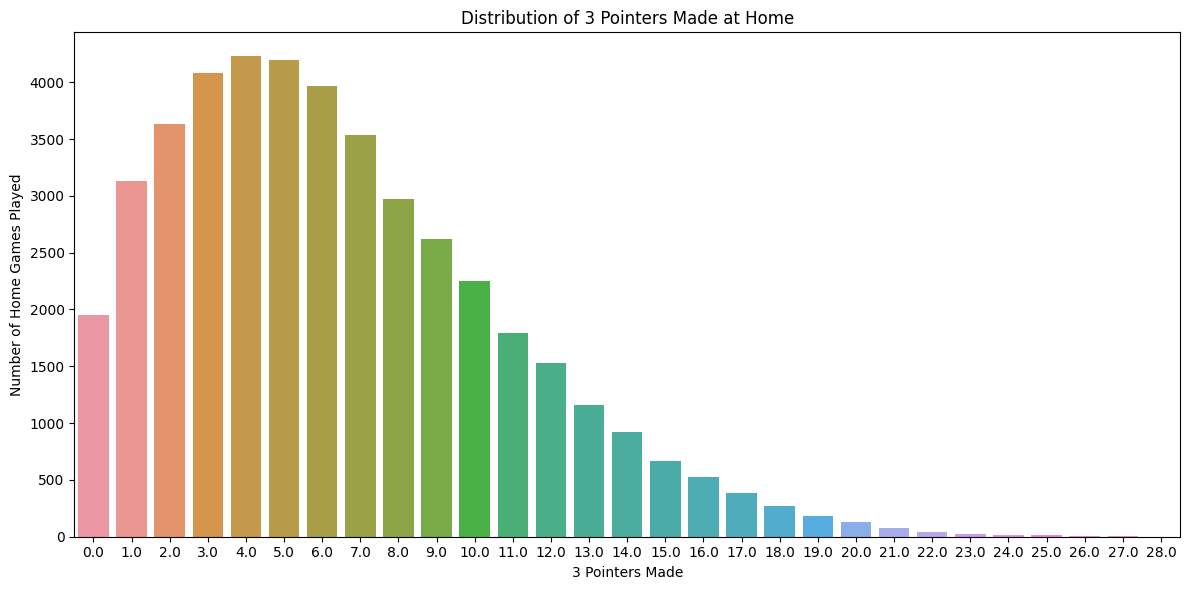

In [694]:
# creating a countplot
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='fg3m_home');
ax.set_title('Distribution of 3 Pointers Made at Home')
ax.set_xlabel('3 Pointers Made')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the visual above, most home teams made 4 three pointers a game

#### fg3a_home

fg3a_home = 3 pointers attempted at Home

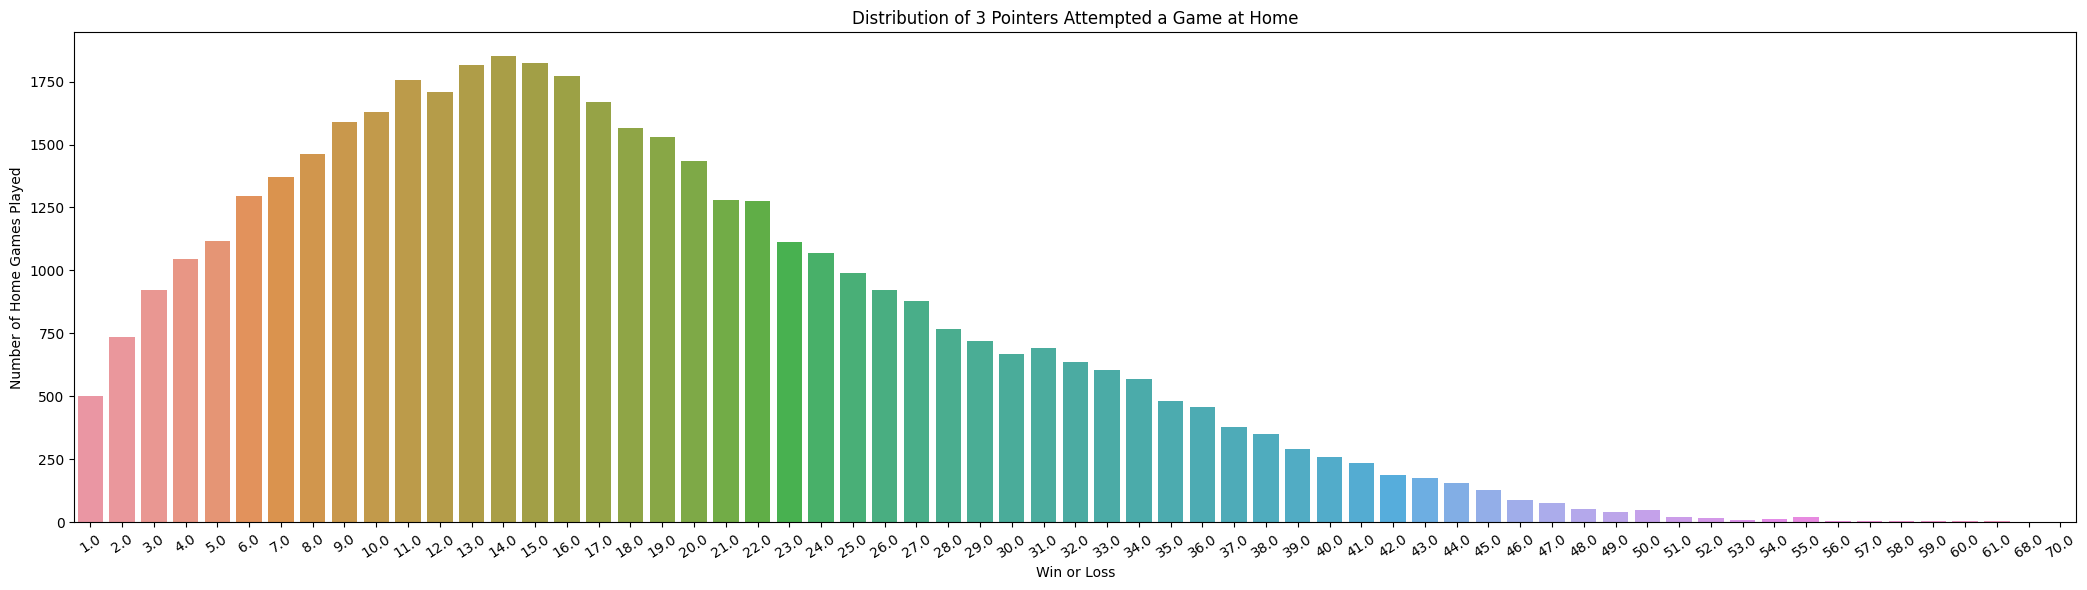

In [695]:
# creating a countplot
plt.figure(figsize=(21,6))
ax = sns.countplot(data=df, x='fg3a_home');
ax.set_title('Distribution of 3 Pointers Attempted a Game at Home')
ax.set_xlabel('Win or Loss')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=33)
plt.tight_layout();

As you can see from the visual above, majority of teams shot 14 three pointers a game

#### fg3_pct_home

fg3_pct_home = 3 point field goal percentage at home

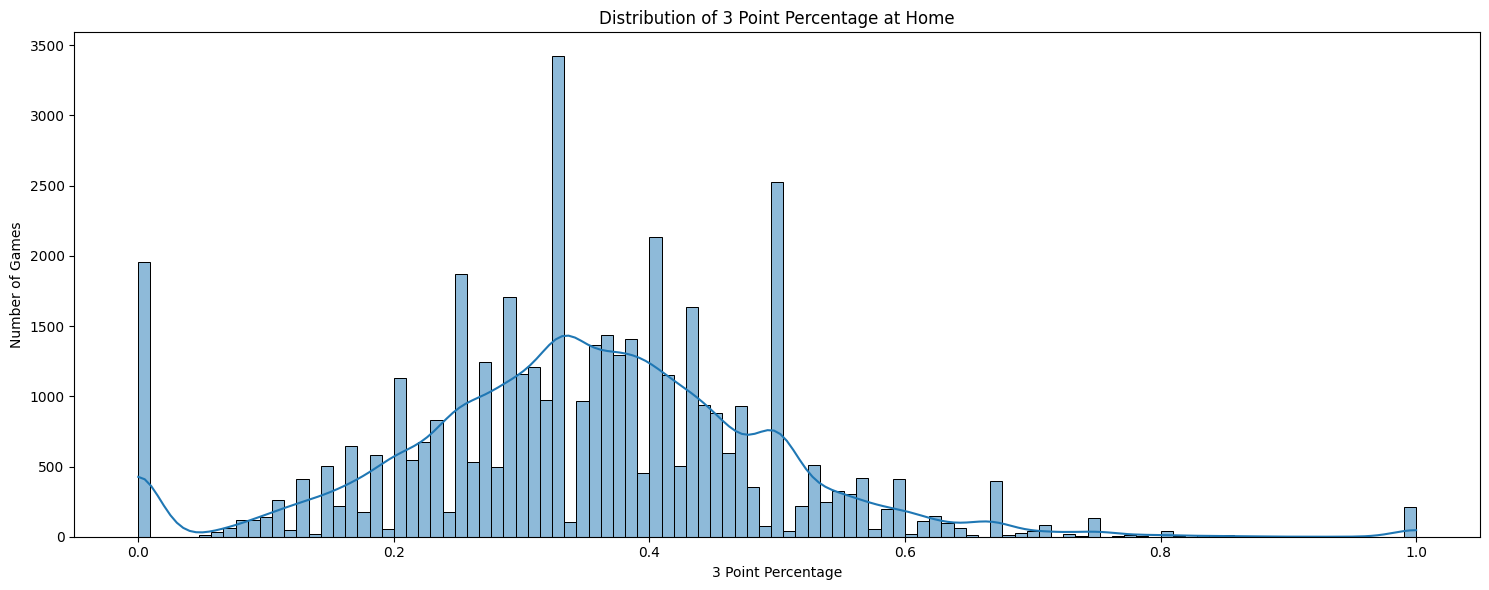

In [696]:
# creating a histogram
plt.figure(figsize=(15,6))
ax = sns.histplot(data=df, x='fg3_pct_home', bins='auto', kde=True);
ax.set_title('Distribution of 3 Point Percentage at Home')
ax.set_xlabel('3 Point Percentage')
ax.set_ylabel('Number of Games')
plt.xticks(rotation=0)
plt.tight_layout();

From the visualization above, most teams shot about 35% from 3 point.

#### ftm_home

ftm_home = free throws made at home

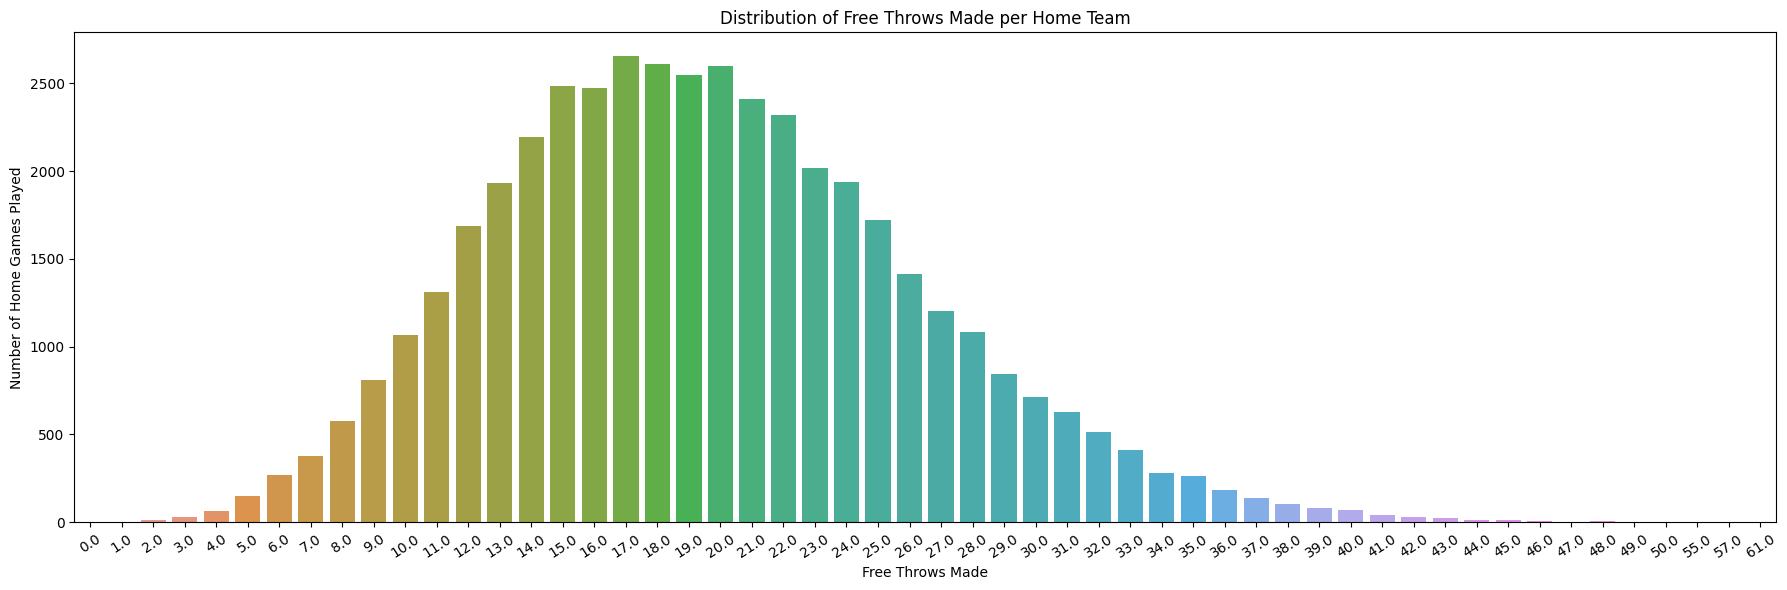

In [697]:
# creating a countplot
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df, x='ftm_home');
ax.set_title('Distribution of Free Throws Made per Home Team')
ax.set_xlabel('Free Throws Made')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=33)
plt.tight_layout();

From the Visualization, most teams made 17-20 free throws per game.

#### fta_home

fta_home = free throws made at home

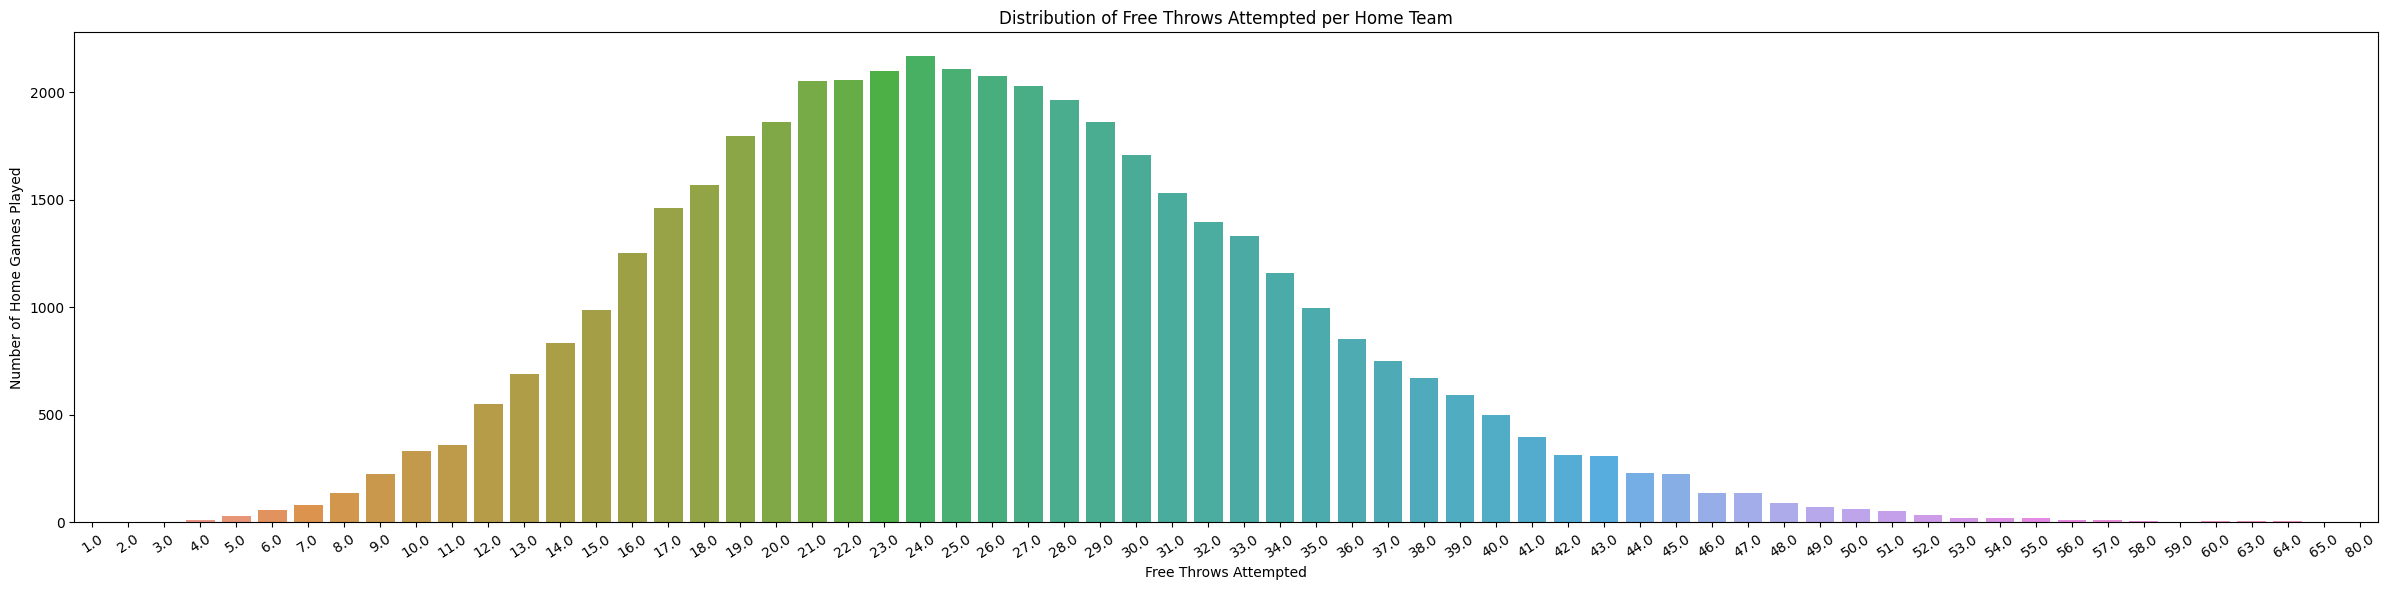

In [698]:
# creating a countplot
plt.figure(figsize=(24,6))
ax = sns.countplot(data=df, x='fta_home');
ax.set_title('Distribution of Free Throws Attempted per Home Team')
ax.set_xlabel('Free Throws Attempted')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=33)
plt.tight_layout();

From the figure above, we can see that most teams average 25 free throws attempted a game.

#### ft_pct_home

ft_pct_home = free throw percentage at home

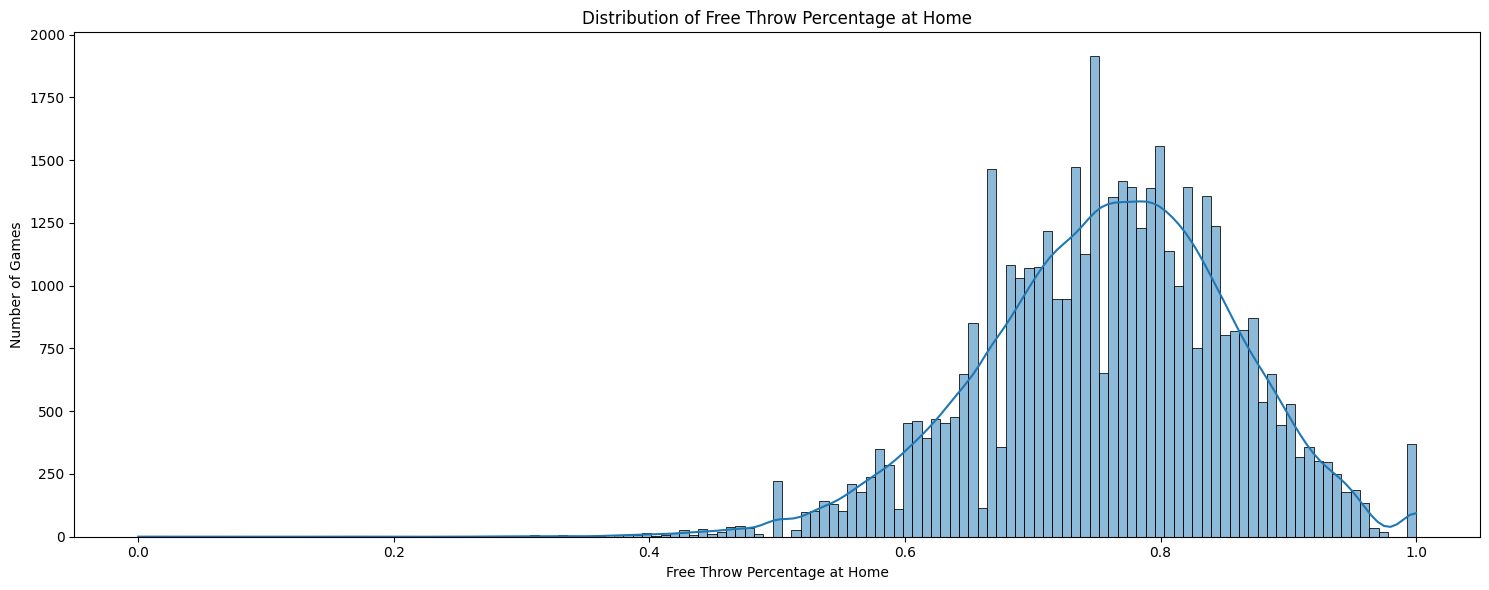

In [699]:
# creating a histogram
plt.figure(figsize=(15,6))
ax = sns.histplot(data=df, x='ft_pct_home', bins='auto', kde=True);
ax.set_title('Distribution of Free Throw Percentage at Home')
ax.set_xlabel('Free Throw Percentage at Home')
ax.set_ylabel('Number of Games')
plt.xticks(rotation=0)
plt.tight_layout();

From the visualization above, we can see the average free throw percentage is 75-80%.

#### oreb_home

oreb_home = offensive rebounds at home

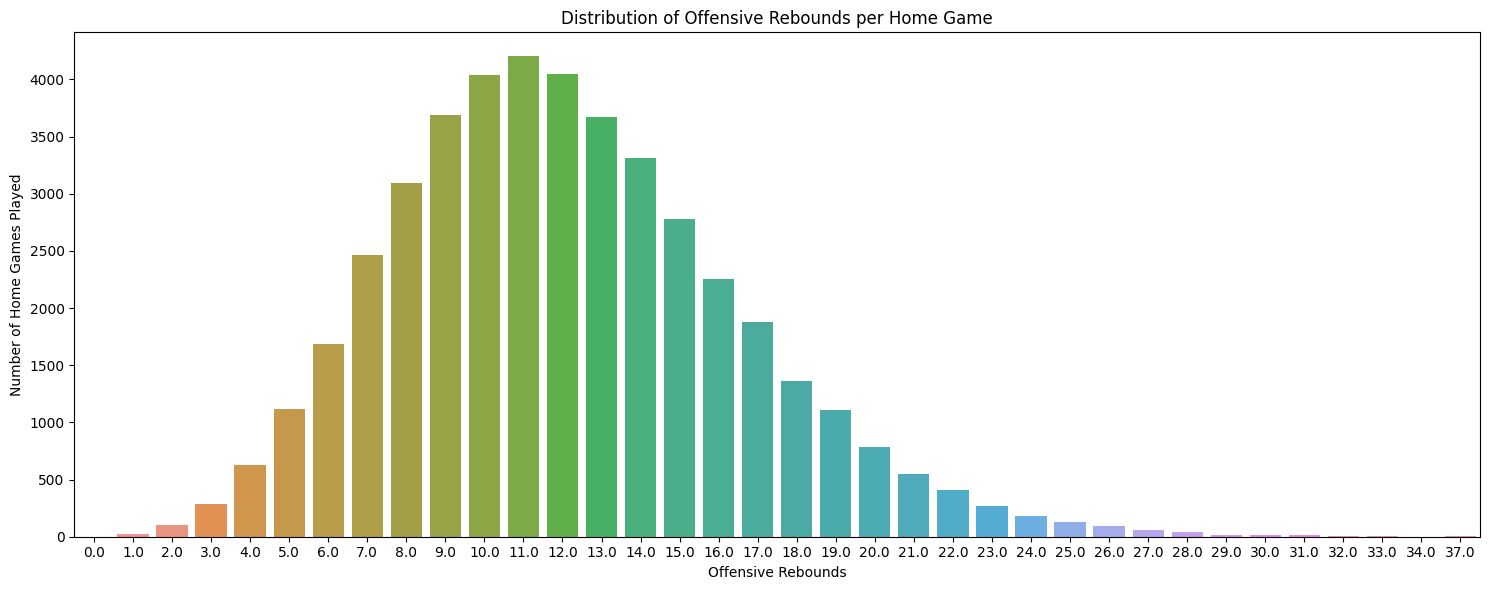

In [700]:
# creating a countplot
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df, x='oreb_home');
ax.set_title('Distribution of Offensive Rebounds per Home Game')
ax.set_xlabel('Offensive Rebounds')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the figure above, most home teams grab about 11 offensive rebounds a game

#### dreb_home

dreb_home = defenseive rebounds at home

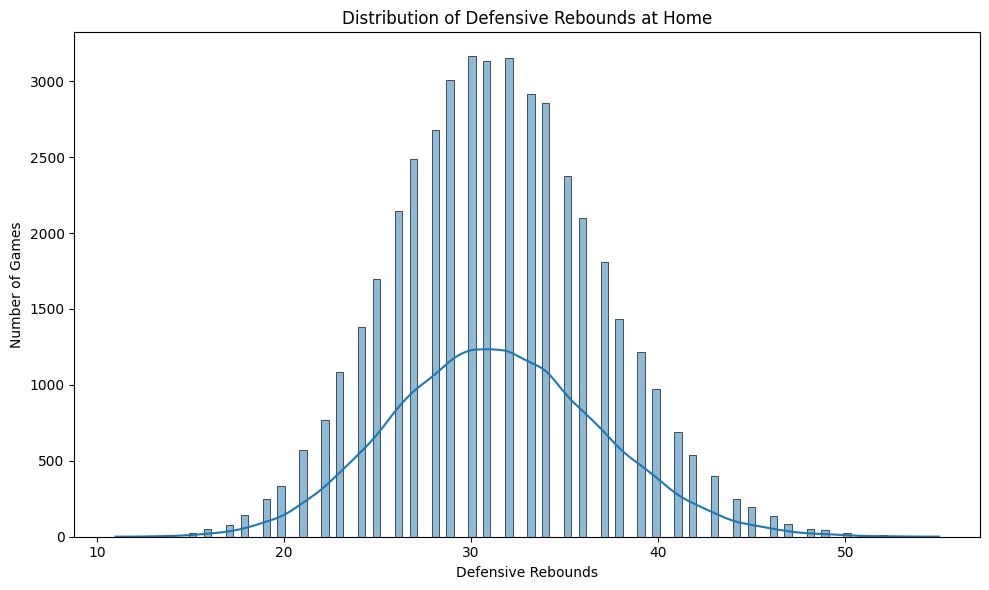

In [701]:
# creating a histogram
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df, x='dreb_home', bins='auto', kde=True);
ax.set_title('Distribution of Defensive Rebounds at Home')
ax.set_xlabel('Defensive Rebounds')
ax.set_ylabel('Number of Games')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the figure above, most home teams grab between 30-33 defenseive rebounds a game.

#### reb_home

reb_home = total rebounds at home

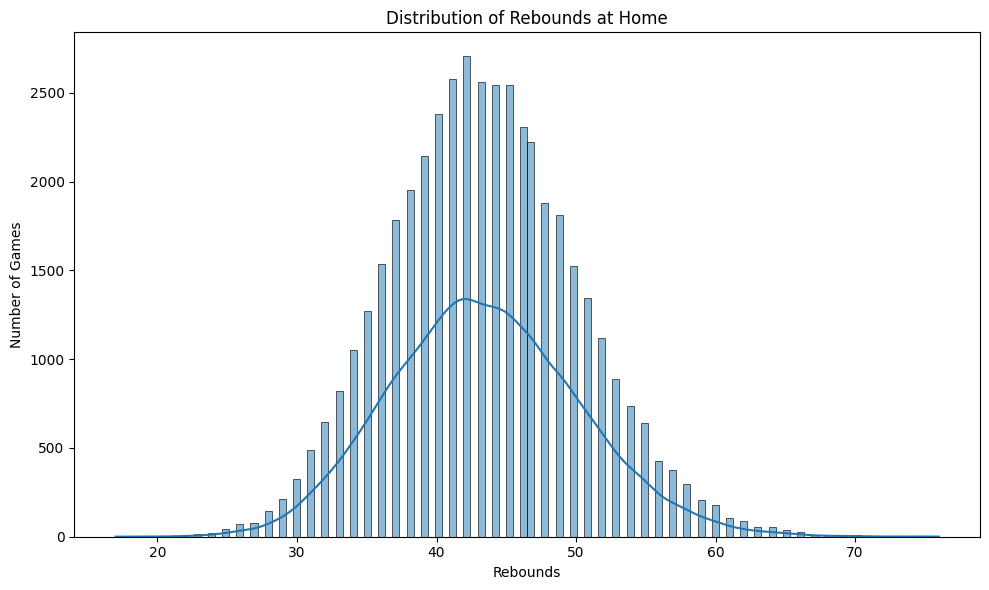

In [702]:
# creating a histogram
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df, x='reb_home', bins='auto', kde=True);
ax.set_title('Distribution of Rebounds at Home')
ax.set_xlabel('Rebounds')
ax.set_ylabel('Number of Games')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the figure above, the averge home team grabs between 40-45 rebounds a game.

#### ast_home

ast_home = assists at home

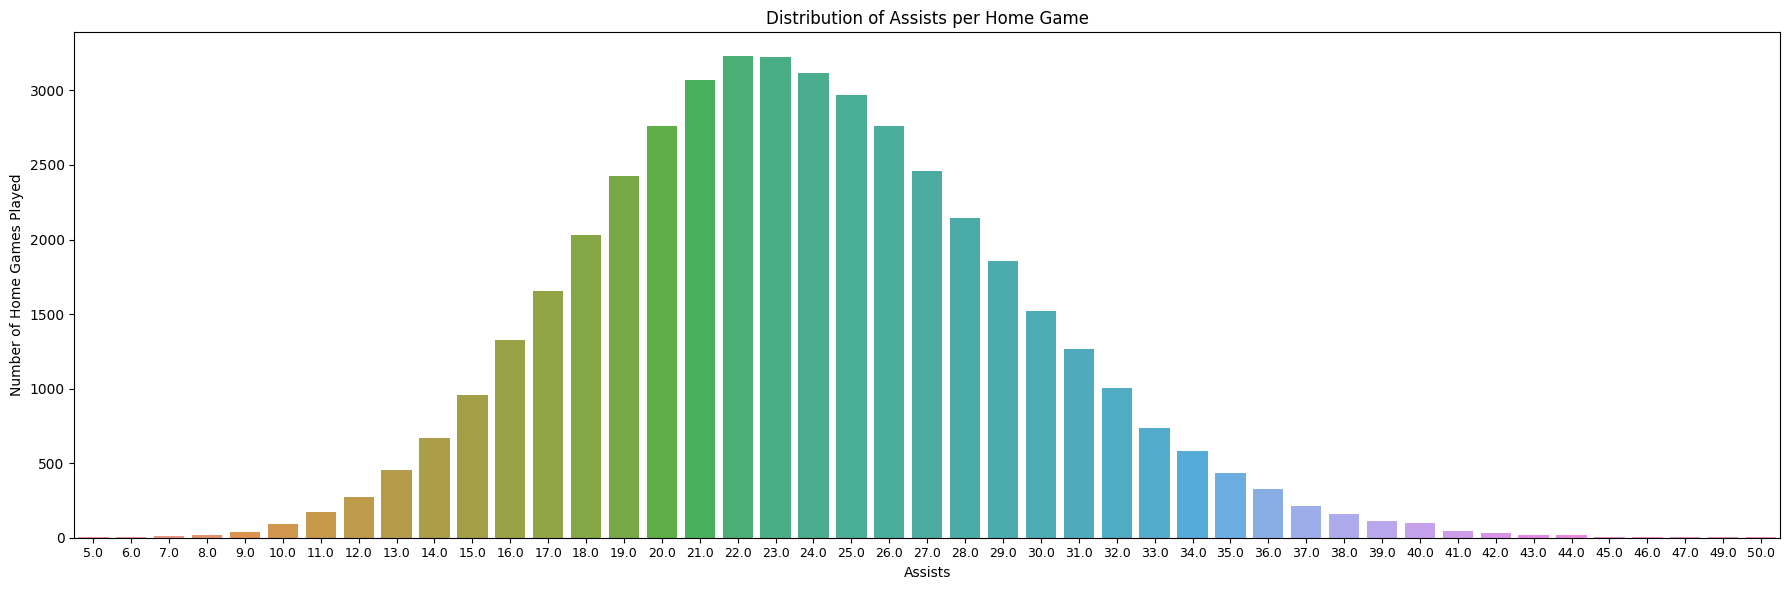

In [703]:
# creating a countplot
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df, x='ast_home');
ax.set_title('Distribution of Assists per Home Game')
ax.set_xlabel('Assists')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=0, fontsize=9)
plt.tight_layout();

As we can see from the figure above, the average home team gets about 23 assists a game

#### stl_home

stl_home = steals at home

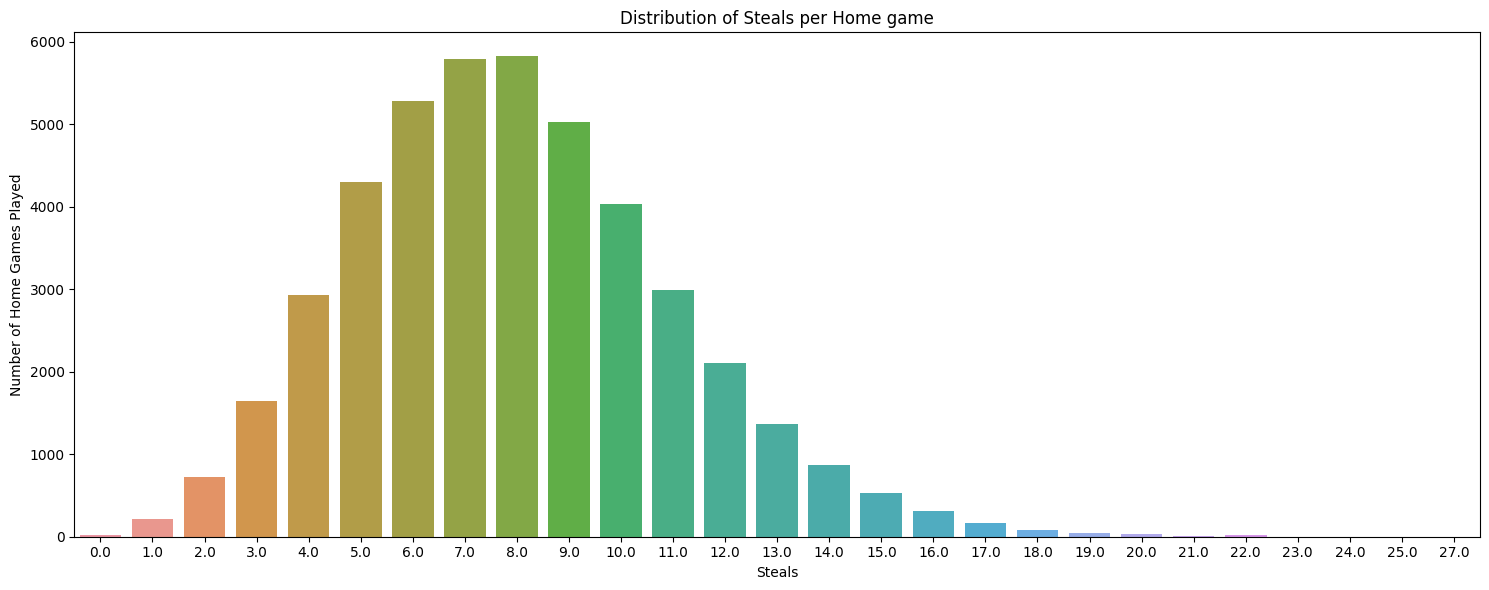

In [704]:
# creating a countplot
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df, x='stl_home');
ax.set_title('Distribution of Steals per Home game')
ax.set_xlabel('Steals')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the figure above, the average amount of steals a home team gets is between 7-8.

#### blk_home

blk_home = blocks at home

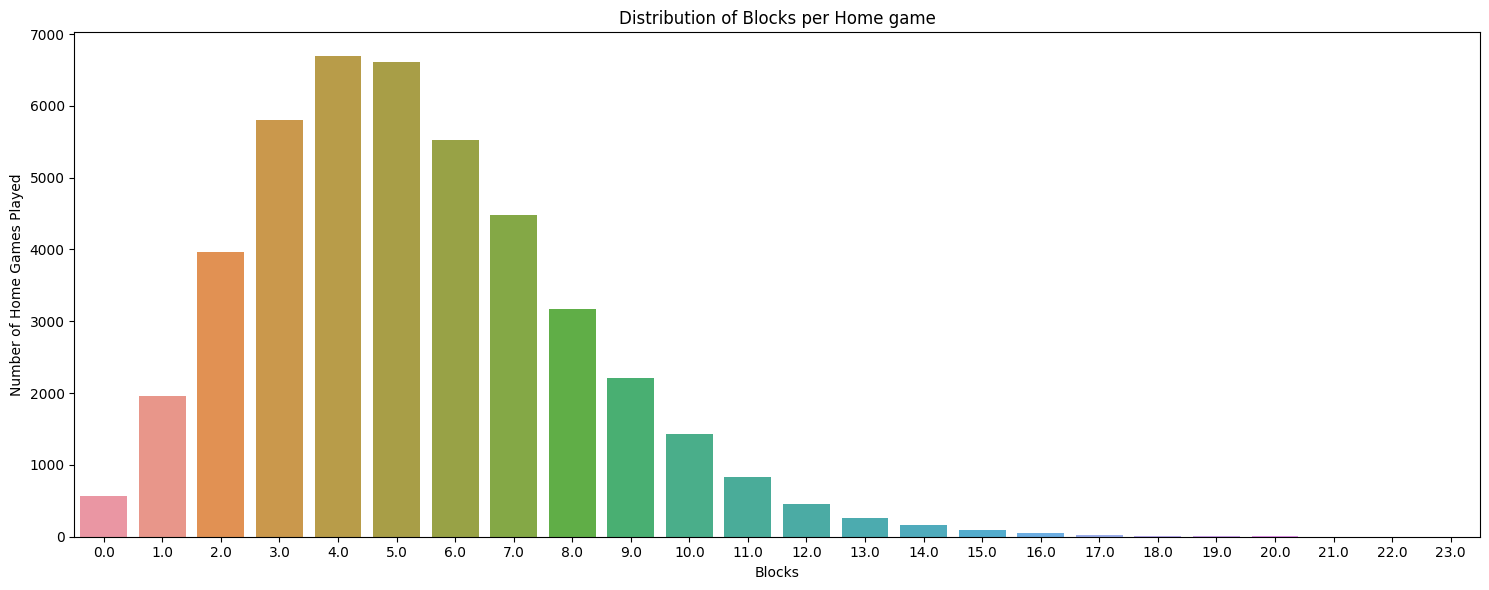

In [705]:
# creating a countplot
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df, x='blk_home');
ax.set_title('Distribution of Blocks per Home game')
ax.set_xlabel('Blocks')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As you can see from the visualization above, the average amount of blocks a Home team gets is between 4-5.

#### tov_home

tov_home = turnovers at home

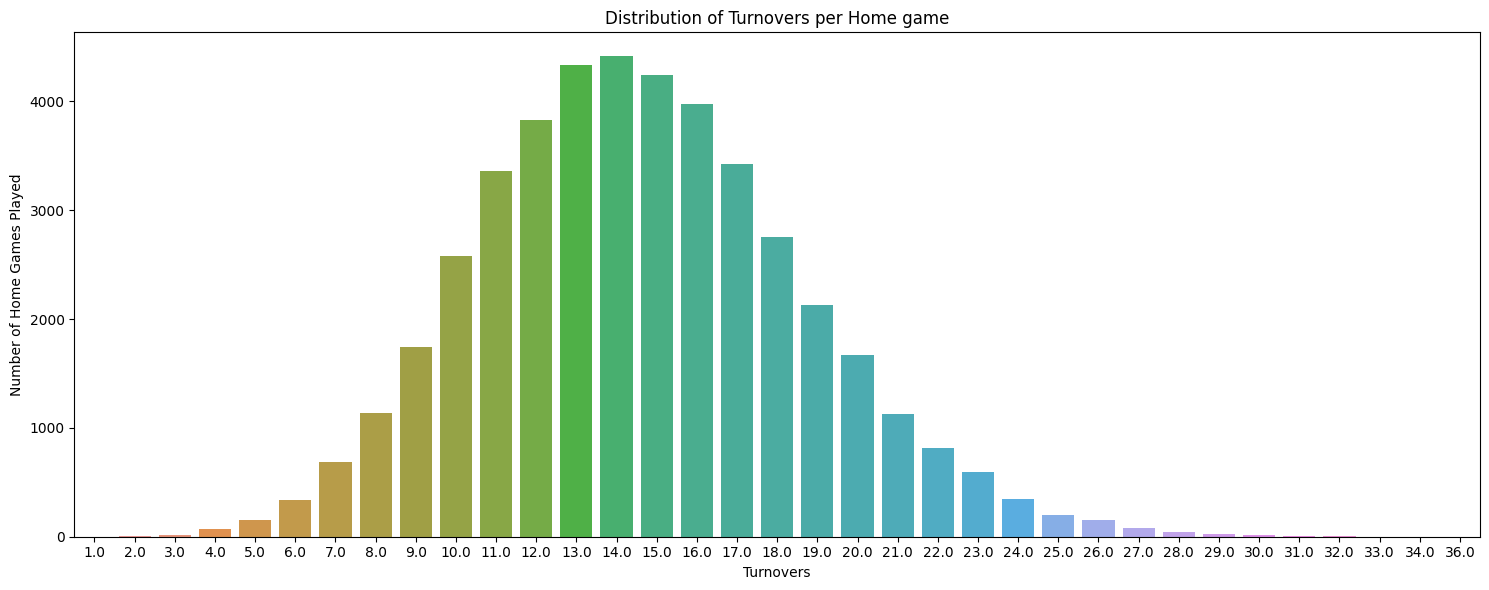

In [706]:
# creating a countplot
plt.figure(figsize=(15,6))
ax = sns.countplot(data=df, x='tov_home');
ax.set_title('Distribution of Turnovers per Home game')
ax.set_xlabel('Turnovers')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As you can see from the graph above, the average amount of turnovers for the Home team is 13-14.

#### pf_home

pf_home = personal fouls at home

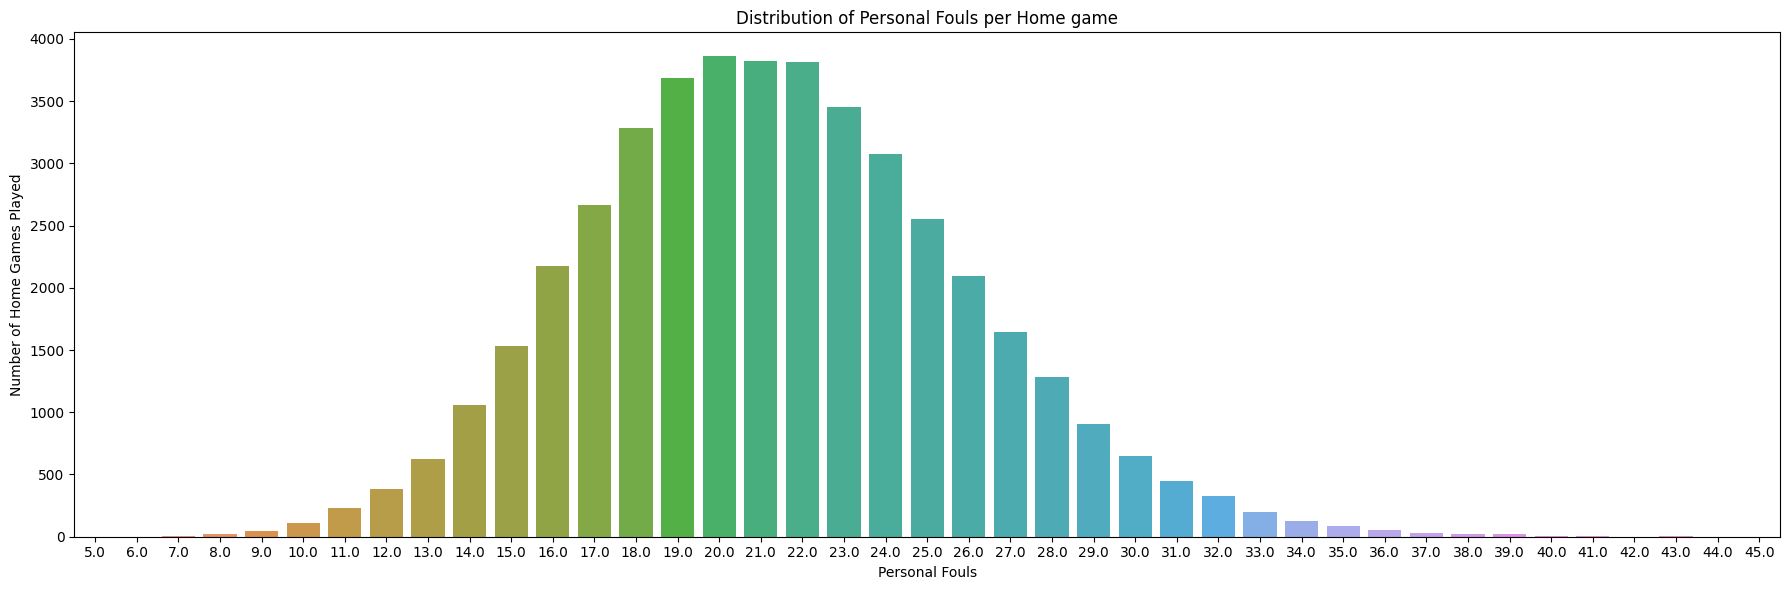

In [707]:
# creating a countplot
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df, x='pf_home');
ax.set_title('Distribution of Personal Fouls per Home game')
ax.set_xlabel('Personal Fouls')
ax.set_ylabel('Number of Home Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the figure above, most home teams commit 19-23 personal fouls a game.

#### pts_home

pts_home = total points scored per home game

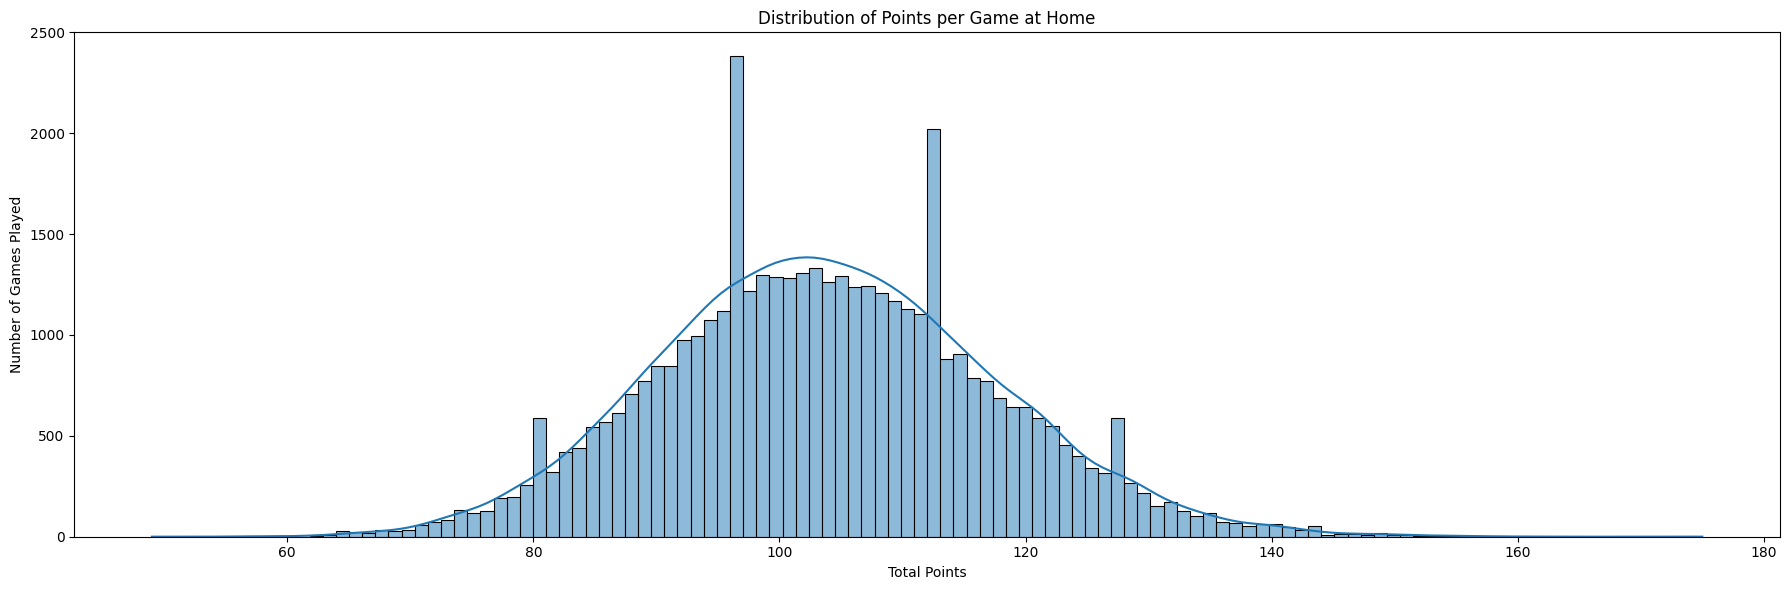

In [708]:
# creating a histogram
plt.figure(figsize=(18,6))
ax = sns.histplot(data=df, x='pts_home', bins='auto', kde=True);
ax.set_title('Distribution of Points per Game at Home')
ax.set_xlabel('Total Points')
ax.set_ylabel('Number of Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the visualization above, most Home teams score about 105 points.

year	month	day

#### year

year = the year the game was played

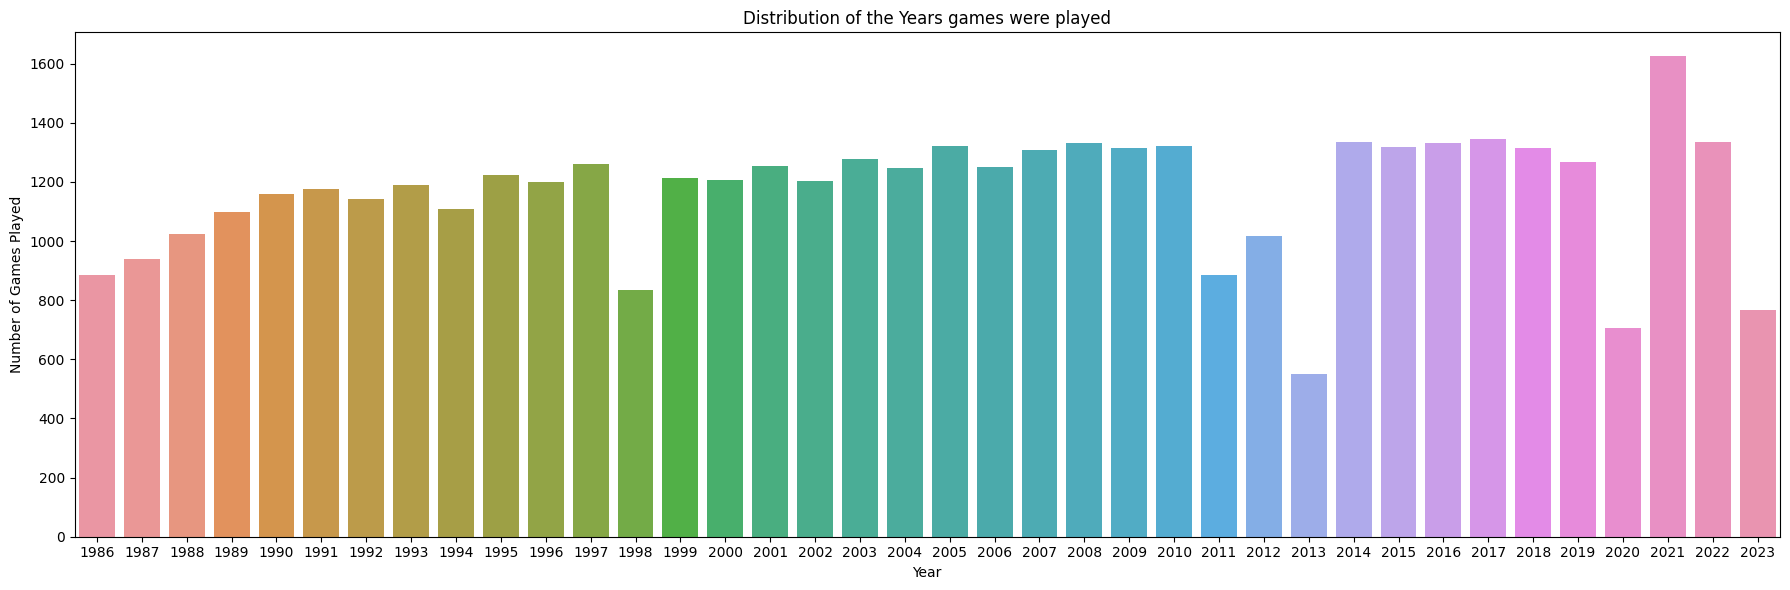

In [709]:
# creating a countplot
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df, x='year');
ax.set_title('Distribution of the Years games were played')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from this graph, 2021 has the most games played due to covid and the introduction to the play-in tournament, while in 2013 there was a lockout season so there will be fewer games played.

#### season_type

season_type = determining whether it is regular season or playoffs

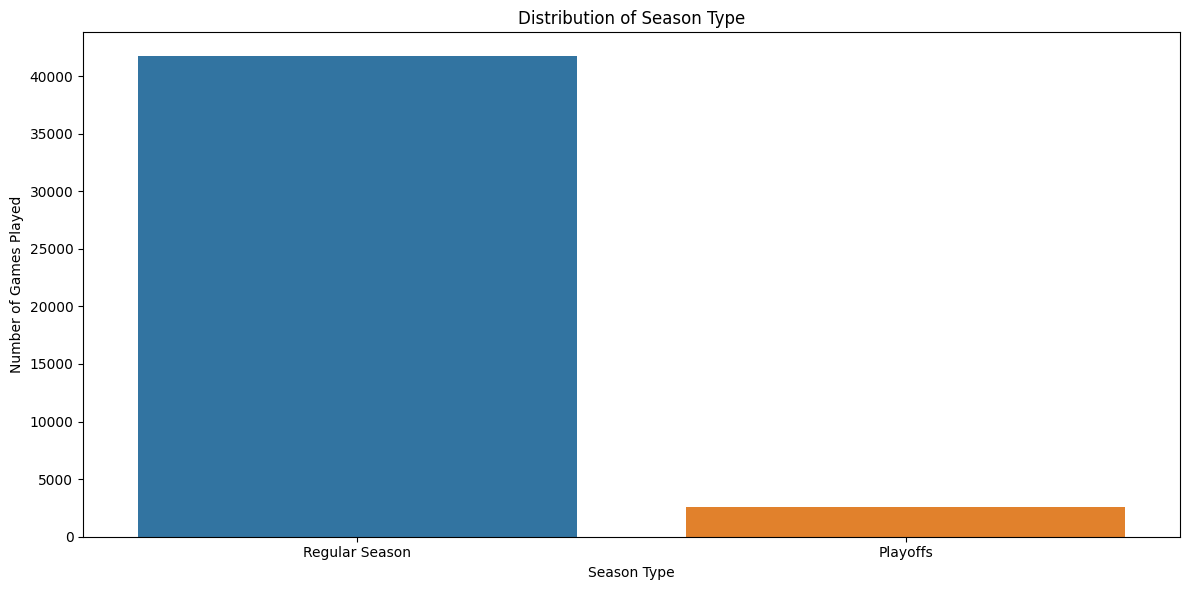

In [710]:
# creating a countplot
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='season_type');
ax.set_title('Distribution of Season Type')
ax.set_xlabel('Season Type')
ax.set_ylabel('Number of Games Played')
plt.xticks(rotation=0)
plt.tight_layout();

As we can see from the figure above, majority of the games played are in the regular season which makes sense because most games are played in the regular season and the best teams compete in the playoffs.

#### Heatmap

In [711]:
# creating a correlation in dataframe
corr = df.corr(numeric_only=True).round(2)
corr

,wl_home,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,year
wl_home,1.00,0.33,-0.05,0.44,0.08,-0.06,0.22,0.19,0.16,0.11,-0.02,0.31,0.24,0.31,0.17,0.16,-0.07,-0.12,0.40,-0.05
fgm_home,0.33,1.00,0.56,0.74,0.16,0.03,0.19,-0.12,-0.13,0.02,0.06,0.15,0.16,0.70,0.15,0.06,-0.09,0.03,0.85,-0.05
fga_home,-0.05,0.56,1.00,-0.13,0.11,0.18,-0.09,-0.19,-0.20,-0.00,0.49,0.18,0.47,0.30,0.15,0.02,-0.23,0.04,0.42,0.03
fg_pct_home,0.44,0.74,-0.13,1.00,0.10,-0.11,0.30,0.01,0.01,0.02,-0.32,0.03,-0.18,0.59,0.06,0.05,0.07,0.01,0.68,-0.09
fg3m_home,0.08,0.16,0.11,0.10,1.00,0.88,0.46,-0.22,-0.25,0.05,-0.28,0.22,0.00,0.15,-0.09,-0.08,-0.10,-0.16,0.35,0.69
fg3a_home,-0.06,0.03,0.18,-0.11,0.88,1.00,0.12,-0.23,-0.26,0.05,-0.23,0.25,0.05,0.01,-0.10,-0.10,-0.12,-0.17,0.19,0.79
fg3_pct_home,0.22,0.19,-0.09,0.30,0.46,0.12,1.00,-0.06,-0.07,0.02,-0.17,0.03,-0.08,0.21,-0.03,0.01,-0.00,-0.03,0.28,0.10
ftm_home,0.19,-0.12,-0.19,0.01,-0.22,-0.23,-0.06,1.00,0.93,0.33,0.09,-0.00,0.06,-0.07,0.08,0.05,0.08,0.26,0.32,-0.22
fta_home,0.16,-0.13,-0.20,0.01,-0.25,-0.26,-0.07,0.93,1.00,-0.02,0.14,-0.01,0.09,-0.09,0.09,0.07,0.09,0.28,0.26,-0.26
ft_pct_home,0.11,0.02,-0.00,0.02,0.05,0.05,0.02,0.33,-0.02,1.00,-0.10,0.02,-0.05,0.02,-0.03,-0.02,-0.02,-0.02,0.19,0.06


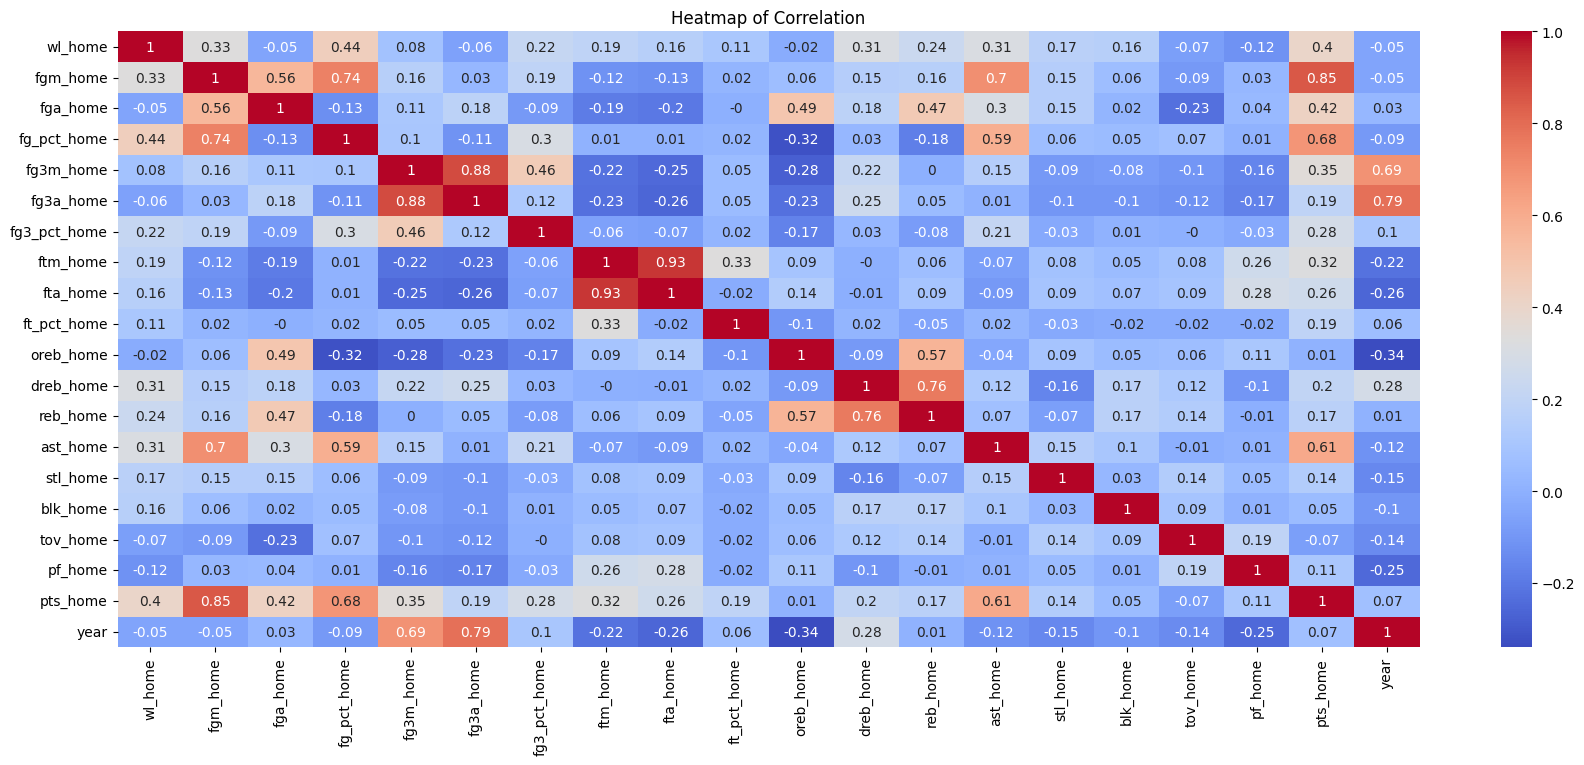

In [716]:
# creating a heatmap
plt.figure(figsize=(21,8))
ax = sns.heatmap(corr, cmap='coolwarm', annot=True)
ax.set_title('Heatmap of Correlation');

To do:

- go in by year and check the wl ratio

- look for any correlations


- this graph here goes all the way back to 1986, the game has changed a lot over time and some of the offensive schemes back then would not make sense in todays game

- taking a look at year - 3ptm and 3pta have a strong correlation